## Will a millennial require financial assistance from the government?

## Abstract

For our final project we will be creating an Ensemble model which we will use to predict if a millennial will require financial assistance from the United States government. To accomplish this goal we will be using Census data from 2019, and selecting features we believe may be relevant to our research question and population of interest.

After exploring and preparing our data, we selected the following five features to include in our ML models: household_income, age, household_status, poverty_category, and marital_status. We then created a Binary Logistic Regression model, a Random Forest model, and a KNN model. Next, we evaluated the performance of each of these models. We then combined their outputs using a stacking Ensemble approach with the meta model being a binary logistic regression, and evaluated the results to determine whether the Ensemble model outperformed the individual models.

The outcomes of our models showed that between the individual models the Random Forest had the best performance, the KNN model had slightly lesser performance, and the Logistic Regression model had the poorest performance. The Ensemble model had nearly the same level of performance as the Random Forest model did, on both training and testing sets. Given this outcome, we do not feel that the added computational expense of an Ensemble model is justified. We would instead prefer to use the Random Forest model in this case.

## Introduction

In the United States, there is no generalized education on finance (at least in public education), so many individuals who graduate high school or even college, do not have a basic understanding of how to live within their means. Our project will attempt to predict whether an individual will receive financial assistance from the government. This would be useful if the government were to offer a free program on financial education to individuals who are likely to require financial assistance. 

We will be using data from the Current Population Survey [2019 Annual Social and Economic (ASEC) Supplement](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html) to predict whether or not a millennial will receive financial assistance from the government. Our project will focus on millennials that are not living with non-family members in the household, and are civilians (not in the armed forces). 

By using millennials for this project, we would be getting a subset of the U.S. population which has recently finished schooling and is now in the workforce, but is still in the process of settling down. If the financial education program were successful, reaching millennials at this stage in their life could prove to be a positive influence on their financial future. 

### Research Questions

**Will a millennial require financial assistance from the government?**

Understanding if an individual would require financial assistance will help governments determine who should be eligible for a free financial education course. Alternately, this information could be used by a bank as a supporting tool when deciding whether or not to issue services such as a credit card or a loan to an individual. If we predict that an individual will need financial assistance, that would decrease his/her probability of (re)payment, and hence decrease the probability that the bank will offer the loan or credit card. 

### Data to be Used

As stated above, we will be using a subset of the Current Population Survey [2019 Annual Social and Economic (ASEC) Supplement](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html). 
From this dataset we will extract only the data referred to people considered "Millennials", which were all born between 1981 - 1996 (according to this [article](https://www.pewresearch.org/fact-tank/2020/04/28/millennials-overtake-baby-boomers-as-americas-largest-generation/#:~:text=As%20of%20July%201%2C%202019,to%2073%20numbered%2071.6%20million.)).
   
The size of the original data set is extremely large and cannot be uploaded to GitHub. Therefore, we extracted a subset of the data referring to our population of interest, and data points we believe are relevant to our goal. The steps we followed for the extraction process are laid out in a separate [Jupyter notebook](https://github.com/vizelman/DAV-6150/blob/master/S_Ferrari_M_Vizelman_R_Ward_FinalProject_Data_Extraction.ipynb). 
The subset which we will use was then uploaded to GitHub.

### Approach

We will take the following approach to answer our research question:  
1. Use Python to select the subset of our dataset that is of interest.  
2. Upload the subset of the dataset to our GitHub repository. Read the dataset from our repository, and load the data into a Pandas dataframe.   
3. Perform EDA work as necessary.  
4. Perform any required data preparation work, including any feature engineering or standardization adjustments we deem necessary for our work.  
5. Apply our knowledge of feature selection and/or dimensionality reduction techniques to identify at least four (4) explanatory variables for inclusion within our models. Split the data into training and testing subsets.  
6. Use the training subset to construct the following three machine learning models which are all appropriate for classification:  
 -  Binary Logistic Regression  
 -  Random Forest
 -  K Nearest Neighbors (KNN)   
7. Select our preferred model. Considering we expect our target variable to be imbalanced, we are going to use not only the accuracy of our models but also the recall, precision, and F1 score. It is reasonable to assume that the cost of not giving help to someone in need is greater than giving help to someone who doesn't need it.  Additionally, in the use case with a bank, it would be more harmful to predict that someone would not require financial assistance and have the bank grant a loan when the individual actually will require financial assistance. Meaning, we should be minimizing the false-negative predictions we generate, and the metric we should be looking at and maximizing is Recall (TP/(TP+FN)).   
8. Evaluate the performance of our chosen model on the test data.   
9. Construct an Ensemble model using a stacking approach, comprised of all of the models built previously. 
10. Compare the results of the Ensemble model to the results of our other models. 
11. Apply the Ensemble model to our test data, and compare those results with the performance of our chosen model on the test data.  
12. Summarize our work and clearly state the conclusions of our research.  

We will now profile our data.


## Data Profiling

The data set we are using includes 28 variables. There are 5 numerical continuous variables, and 23 categorical variables including our target variable, financial_assistance_flag. 

Below is a data dictionary of these variables. 


|**Variable Name**|**Description**|**Values**|**Type**|
|-----------------|---------------|----------|--------|
|age|Age|00-79 = 0-79 years of age <br /> 80 = 80-84 years of age <br /> 85 = 85+ years of age|continuous|
|gender|Sex|1 = Male <br/> 2 = Female|categorical|
|race|Race|01 = White only <br/> 02 = Black only <br/> 03 = American Indian, Alaskan Native only (AI) <br/> 04 = Asian only <br/> 05 = Hawaiian/Pacific Islander only (HP) <br/> 06 = White-Black <br/> 07 = White-AI <br/> 08 = White-Asian <br/> 09 = White-HP <br/> 10 = Black-AI <br/> 11 = Black-Asian <br/> 12 = Black-HP <br/> 13 = AI-Asian <br/> 14 = AI-HP <br/> 15 = Asian-HP <br/> 16 = White-Black-AI <br/> 17 = White-Black-Asian <br/> 18 = White-Black-HP <br/> 19 = White-AI-Asian <br/> 20 = White-AI-HP <br/> 21 = White-Asian-HP <br/> 22 = Black-AI-Asian <br/> 23 = White-Black-AI-Asian <br/> 24 = White-AI-Asian-HP <br/> 25 = Other 3 race comb. <br/> 26 = Other 4 or 5 race comb.|categorical|
|span_hisp_latin|Are you Spanish, Hispanic, or Latino?|1 = Yes <br/> 2 = No|categorical|
|marital_status|Marital status| 1 = Married - civilian spouse present <br/> 2 = Married - AF spouse present <br/> 3 = Married - spouse absent (exc.separated) <br/> 4 = Widowed <br/> 5 = Divorced <br/> 6 = Separated <br/> 7 = Never married|categorical|
|education_level|Educational attainment|0 = Children <br /> 31 = Less than 1st grade <br /> 32 = 1st,2nd,3rd,or 4th grade <br /> 33 = 5th or 6th grade <br /> 34 = 7th and 8th grade <br /> 35 = 9th grade <br /> 36 = 10th grade <br /> 37 = 11th grade <br /> 38 = 12th grade no diploma <br /> 39 = High school graduate <br /> 40 = Some college but no degree <br /> 41 = Associate degree in college - occupation/vocation program <br /> 42 = Associate degree in college - academic program <br /> 43 = Bachelor's degree <br />  44 = Master's degree <br /> 45 = Professional school degree <br /> 46 = Doctorate degree (for example: PHD,EDD)| categorical|
|active_certification_license|Do you have a currently active professional certification or a state or industry license?| -1 = Not in universe <br/> 1 = Yes <br/> 2 = No|categorical <br /> Universe: PRPERTYP=02=Adult civilian household member|
|disability|Does this person have any disability conditions? (blind, deaf, other physical or mental)|-1 = NIU <br/> 1 = Yes <br/> 2 = No|categorical <br/> PRPERTYP=02=Adult civilian household member|
|health_status|Health status|1= Excellent<br />2= Very good<br />3= Good<br />4= Fair<br />5= Poor|categorical|
|insurance_coverage_flag|Currently covered by health insurance coverage|1= Yes<br />2= No|categorical|
|citizenship|Citizenship group|1 = Native, born in US <br/> 2 = Native, born in PR or US outlying area <br/> 3 = Native, born abroad of US parent(s) <br/> 4 = Foreign born, US cit by naturalization <br/> 5 = Foreign born, not a US citizen|categorical|
|birth_country|In what country were you born?|057-555 range, 057=United States, see full detail in Appendix H in the [Technical Documentation](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar19.pdf) of ASEC 2019 (page 365)|categorical|
|immigration_period|When did you come to the U.S. to stay (immigrated)?|00 = Not an immigrant <br/> 01 = Before 1950 <br/> 02 = 1950-1959 <br/> 03 = 1960-1964 <br/> 04 = 1965-1969 <br/> 05 = 1970-1974 <br/> 06 = 1975-1979 <br/> 07 = 1980-1981 <br/> 08 = 1982-1983 <br/> 09 = 1984-1985 <br/> 10 = 1986-1987 <br/> 11 = 1988-1989 <br/> 12 = 1990-1991 <br/> 13 = 1992-1993 <br/> 14 = 1994-1995 <br/> 15 = 1996-1997 <br/> 16 = 1998-1999 <br/> 17 = 2000-2001 <br/> 18 = 2002-2003 <br/> 19 = 2004-2005 <br/> 20 = 2006-2007 <br/> 21 = 2008-2009 <br/> 22 = 2010-2011 <br/> 23 = 2012-2013 <br/> 24 = 2014-2015 <br/> 25 = 2016-2019|categorical|
|employed_or_not|Major labor force recode|0 = Not in universe<br/>1 = Employed - at work<br/>2 = Employed - absent<br/>3 = Unemployed - on layoff<br/>4 = Unemployed - looking<br/>5 = Not in labor force - retired<br/>6 = Not in labor force - disabled<br/>7 = Not in labor force - other|categorical|
|worker_class|Class of worker|0 = Not in universe or children and Armed Forces<br/>1 = Private<br/>2 = Federal government<br/>3 = State government<br/>4 = Local government<br/>5 = Self-employed-incorporated<br/>6 = Self-employed-not incorporated<br/>7 = Without pay<br/>8 = Never worked|categorical<br/>Universe: PEMLR (employed_or_not) =1-3 ,or PEMLR=4-7 and person worked in the last 12 months|
|industry|Major industry code|0 = Not in universe, or children<br/>1 = Agriculture, forestry,fishing, and hunting<br/>2 = Mining<br/>3 = Construction<br/>4 = Manufacturing<br/>5 = Wholesale and retail trade<br/>6 = Transportation and utilities<br/>7 = Information<br/>8 = Financial activities<br/>9 = Professional and business services<br/>10 = Educational and health services<br/>11 = Leisure and hospitality<br/>12 = Other services<br/>13 = Public administration<br/>14 = Armed Forces|categorical <br/> Universe: A_CLSWKR (worker_class) = 1-7|
|total_income|Total persons income|0 = none<br />negative amt = income (loss) <br />positive amt = income<br/> -99999:99999999 range|continuous <br /> Universe: All Persons aged 15+|
|taxable_income|Taxable income amount|0 = none; dollar amount|continuous|
|poverty_category|Poverty level of person|1 = below poverty level<br />2 = 100 - 124 percent of the poverty level<br />3 = 125 - 149 percent of the poverty level<br />4 = 150 and above the poverty level|categorical|
|child_outside_household|Does this person have a child living outside the household?|0= Not in universe<br />1= Yes<br />2= No|categorical <br /> Universe: All Persons aged 15+|
|child_support_flag|Is this person required to pay child support?|0= Not in universe<br/> 1= Yes<br/> 2=No|categorical <br/> Universe: CHELSEW_YN (child_outside_household) = 1|
|annual_child_support|Annual amount of child support paid|0 = Not in universe<br /> 1:99999 = amount paid in child support|continuous <br />Universe: CHSP_YN = 1|
|household_status|Detailed household summary|<ins>In household:</ins> <br/> 1 = Householder <br/> 2 = Spouse of householder <br/> <ins>Child of householder:</ins> <br/> 3 = Under 18 years, single (never married) <br/> 4 = Under 18 years, ever married <br/> 5 = 18 years and over <br/> <ins>Other household members:</ins> <br/> 6 = Other relative of householder <br/> 7 = Nonrelative of householder <br/> 8 = Secondary individual|categorical|
|metropolitan_status|Metropolitan status|1 = Metropolitan<br/> 2 = Non-metropolitan<br/> 3 = Not identified|categorical|
|state|State code|01-56 State code|categorical|
|region|Region|1 = Northeast<br/> 2 = Midwest<br/> 3 = South<br/> 4 = West|categorical|
|household_income|Total household income|negative amt = income (loss) <br />positive amt = income<br/> -99999:99999999 range|continuous <br /> Universe: All Persons aged 15+|
|financial_assistance_flag|Received financial assistance?|0 = not in universe <br />1 = yes <br />2 = no|categorical <br />Universe: All Persons aged 15+|

## Exploratory Data Analysis

We will now perform an exploratory data analysis on our dataset. We begin by reading in the file from GitHub, checking for missing values, and checking the data types for each of our features.

In [1]:
#first import the necessary libraries and modules
import pandas as pd
import numpy as np

#next read in the millennials data file from GitHub
file_location3 = "https://raw.githubusercontent.com/vizelman/DAV-6150/master/final_project_data.csv"
millenials_data = pd.read_csv(file_location3)

#display all columns
pd.set_option('display.max_columns', None) 

#print shape of dataframe
print(millenials_data.shape)

#check results
millenials_data.head()

(32883, 28)


,age,gender,race,span_hisp_latin,marital_status,education_level,active_certification_license,disability,health_status,insurance_coverage_flag,citizenship,birth_country,immigration_period,employed_or_not,worker_class,industry,total_income,taxable_income,poverty_category,child_outside_household,child_support_flag,annual_child_support,household_status,metropolitan_status,state,region,household_income,financial_assistance_flag
0,37,1,1,2,7,39,2,2,3,2,1,57,0,1,1,10,12000,0,3,2,0,0,5,2,23,1,22727,2
1,33,1,6,2,1,39,2,2,3,2,1,57,0,1,6,3,50000,0,2,2,0,0,2,2,23,1,50200,2
2,33,1,1,2,1,40,2,2,2,1,1,57,0,1,1,5,24003,4,1,2,0,0,1,2,23,1,24004,2
3,29,2,1,2,1,40,2,2,3,1,1,57,0,7,0,0,1,0,1,2,0,0,2,2,23,1,24004,2
4,34,2,1,2,1,41,1,2,2,1,1,57,0,1,1,10,43560,71900,4,2,0,0,1,2,23,1,95900,2


In [2]:
#check the data set for missing (null) values
millenials_data.isnull().sum()

age                             0
gender                          0
race                            0
span_hisp_latin                 0
marital_status                  0
education_level                 0
active_certification_license    0
disability                      0
health_status                   0
insurance_coverage_flag         0
citizenship                     0
birth_country                   0
immigration_period              0
employed_or_not                 0
worker_class                    0
industry                        0
total_income                    0
taxable_income                  0
poverty_category                0
child_outside_household         0
child_support_flag              0
annual_child_support            0
household_status                0
metropolitan_status             0
state                           0
region                          0
household_income                0
financial_assistance_flag       0
dtype: int64

From the above, we do not have missing values in our data set.

In [3]:
#check data types
millenials_data.dtypes

age                             int64
gender                          int64
race                            int64
span_hisp_latin                 int64
marital_status                  int64
education_level                 int64
active_certification_license    int64
disability                      int64
health_status                   int64
insurance_coverage_flag         int64
citizenship                     int64
birth_country                   int64
immigration_period              int64
employed_or_not                 int64
worker_class                    int64
industry                        int64
total_income                    int64
taxable_income                  int64
poverty_category                int64
child_outside_household         int64
child_support_flag              int64
annual_child_support            int64
household_status                int64
metropolitan_status             int64
state                           int64
region                          int64
household_in

All the data types of our columns are as expected, since the values were coded as numbers. However, many of our variables are categorical and we will change their type to 'category' later on. We will now check for duplicate rows.

In [4]:
#check for duplicates
millenials_data.duplicated().sum()

10

We have ten rows of data that are duplicates. However, we decided not to remove them because we believe they are still valid, and that they only exist as duplicates because we did not bring in the ID field. Furthermore, in a dataset of this size, this small number of "duplicates" if they truly are duplicates, will have little impact on our models. 

We will now create lists of the numeric and categorical variables which we will use later on in our EDA.

In [5]:
#define list of numerical columns
num_columns = ['age', 'total_income', 'taxable_income', 'annual_child_support', 'household_income']

#define list of categorical columns

#create empty list of numeric variables indices
num_col_index = []
#get the indices
for i in num_columns:
    num_col_index.append(millenials_data.columns.get_loc(i))
#make list of categorical columns:
#if not in list of numeric indices
#then add to list of categorical
cat_columns = [i for j, i in enumerate(millenials_data.columns.to_list()) if j not in num_col_index]

#check results
print(cat_columns)

['gender', 'race', 'span_hisp_latin', 'marital_status', 'education_level', 'active_certification_license', 'disability', 'health_status', 'insurance_coverage_flag', 'citizenship', 'birth_country', 'immigration_period', 'employed_or_not', 'worker_class', 'industry', 'poverty_category', 'child_outside_household', 'child_support_flag', 'household_status', 'metropolitan_status', 'state', 'region', 'financial_assistance_flag']


In [6]:
#make a copy of the df
millenials = millenials_data.copy()

#change data type of all categorical variables to category
for col in cat_columns:
    millenials[col] = millenials[col].astype('category')
    
#check data types
millenials.dtypes

age                                int64
gender                          category
race                            category
span_hisp_latin                 category
marital_status                  category
education_level                 category
active_certification_license    category
disability                      category
health_status                   category
insurance_coverage_flag         category
citizenship                     category
birth_country                   category
immigration_period              category
employed_or_not                 category
worker_class                    category
industry                        category
total_income                       int64
taxable_income                     int64
poverty_category                category
child_outside_household         category
child_support_flag              category
annual_child_support               int64
household_status                category
metropolitan_status             category
state           

In [7]:
#show full numbers
pd.set_option('float_format', '{:f}'.format)

#get summary statistics for our numerical columns
millenials[num_columns].describe()

,age,total_income,taxable_income,annual_child_support,household_income
count,32883.000000,32883.000000,32883.000000,32883.000000,32883.000000
mean,31.135572,44045.188973,31754.178451,80.318280,100841.929721
std,4.540995,60586.531619,67175.851699,823.520225,103251.374613
min,23.000000,-9999.000000,0.000000,0.000000,-9999.000000
25%,27.000000,13005.000000,0.000000,0.000000,45000.000000
50%,31.000000,32509.000000,8000.000000,0.000000,78900.000000
75%,35.000000,57029.000000,41000.000000,0.000000,125700.500000
max,38.000000,1390000.000000,2176079.000000,25000.000000,2244014.000000


From the above, we see that the ranges of all the numerical variables are valid. 
The age range is in line with the known ages of millennials. The negative values for total and household income are valid since some people can have losses instead of income. The taxable income and the annual child support are only positive as expected.

In [8]:
#get summary statistics for our categorical columns
millenials[cat_columns].describe()

,gender,race,span_hisp_latin,marital_status,education_level,active_certification_license,disability,health_status,insurance_coverage_flag,citizenship,birth_country,immigration_period,employed_or_not,worker_class,industry,poverty_category,child_outside_household,child_support_flag,household_status,metropolitan_status,state,region,financial_assistance_flag
count,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883,32883
unique,2,23,2,7,16,2,2,5,2,5,153,20,7,9,15,4,2,3,4,3,51,4,2
top,2,1,2,1,43,2,2,2,1,1,57,0,1,1,10,4,2,0,1,1,6,3,2
freq,17439,25021,25450,17119,8560,25873,31418,11753,28346,26446,26443,26446,25041,21571,6316,26907,31985,31985,17340,27375,3509,12367,32399


In [9]:
#check the range of values in the categorical variables
val_range = pd.concat([millenials[cat_columns].min().rename('min'),
                       millenials[cat_columns].max().rename('max')], axis=1)
val_range

,min,max
gender,1.000000,2.000000
race,1.000000,25.000000
span_hisp_latin,1.000000,2.000000
marital_status,1.000000,7.000000
education_level,31.000000,46.000000
active_certification_license,1.000000,2.000000
disability,1.000000,2.000000
health_status,1.000000,5.000000
insurance_coverage_flag,1.000000,2.000000
citizenship,1.000000,5.000000


From the above, the ranges of all the categorical variables are valid.

Next, we will check the target variable, financial_assistance_flag.

In [10]:
#print the percentage of observations in each class of our target variable (financial_assistance_flag)
df_target = pd.DataFrame((millenials["financial_assistance_flag"].value_counts()/
                          len(millenials["financial_assistance_flag"]))*100)
df_target.rename(columns = {'financial_assistance_flag': 'percentage of millennials'}, inplace = True)
df_target

,percentage of millennials
2,98.528115
1,1.471885


In [11]:
#print number of observations in each class of our target variable (financial_assistance_flag)
df_target_o = pd.DataFrame(millenials["financial_assistance_flag"].value_counts())
df_target_o.rename(columns = {'financial_assistance_flag': 'millennials'}, inplace = True)
df_target_o

,millennials
2,32399
1,484


As we can see from the above results, our target variable is highly unbalanced.

Next, we will look at the distributions of each of our variables.  
We will split this portion into numerical data for which we will plot histograms and box-plots, and categorical data for which we will plot bar plots.

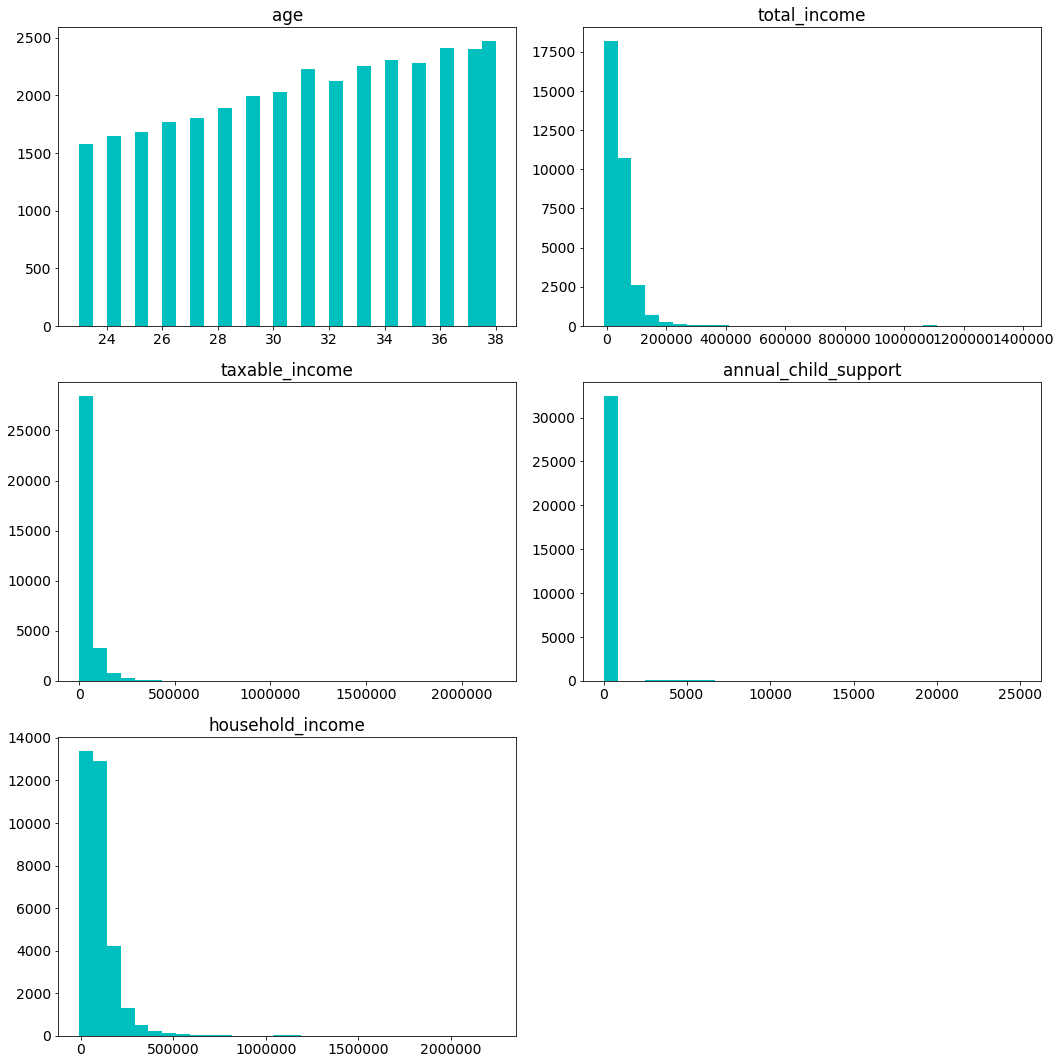

In [12]:
#import the necessary libraries and modules
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
np.warnings.filterwarnings('ignore')

#plot a histogram for each of our numerical attributes

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(15,15)}) 

#use an index to identify the spot of the subplot
j=1
for k in num_columns : #for each numerical column 
    plt.subplot(3,2,j) 
    plt.hist(millenials[k],bins=30, color='c')
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space
plt.tight_layout()

#show results    
plt.show()

From the above we can see that the variables related to income (i.e. household_income, total_income, and taxable_income) are skewed right. This is as expected because income is usually skewed right in the United States, with most people making lower amounts and progressively fewer individuals making higher amounts. It also appears that age is skewed to the left, with fewer individuals around the age of 24 than 38. Child support is also skewed right, with most individuals in our dataset claiming fewer than 5,000 dollars in child support. This is not surprising as there have been numerous news stories and [articles](https://www.forbes.com/sites/josephcoughlin/2018/06/11/millennials-arent-having-kids-heres-why-thats-a-problem-for-baby-boomer-real-estate-retirement/#34772e262058) about how millennials are having kids much later in life than previous generations, and without kids, there is obviously no child support. Additionally, the range for child support is small, which we expected considering that child support is proportional to household income.

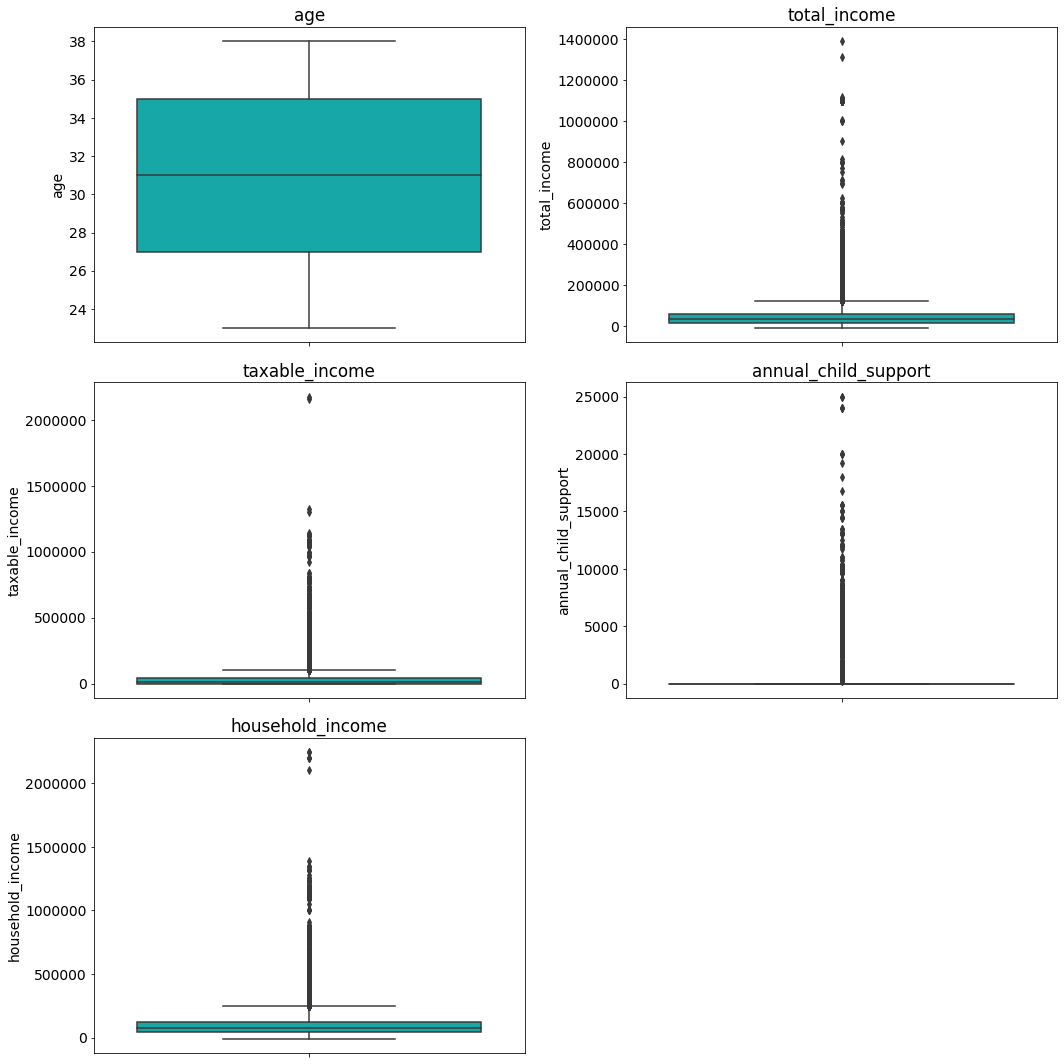

In [13]:
#plot boxplots of the distribution of each numerical variable

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(15,15)}) 

#use an index to identify the spot of the subplot
j=1
for k in num_columns:   #for each numerical variable 
    plt.subplot(3,2,j) 
    sns.boxplot(data=millenials, y=k , color='c')
    plt.title('%s' %k)
    j=j+1
plt.tight_layout()

#show results    
plt.show()

Our boxplots confirm the previous results about the distribution of the variable and moreover indicate the presence of outliers in each variable except age. This was expected since we selected the data to use based on the age column. 

We will now see how many outliers we have for each of these variables.

In [14]:
#count number of outliers per column
columns = num_columns
new_df = millenials[num_columns]  #create a copy of our data frame
print('Current Shape of dataset:',new_df.shape)  #show shape of dataframe before

#use a for loop to iterate through the columns and count outliers
for k in columns:
    IQ3 = new_df[k].quantile(0.75)
    IQ1 = new_df[k].quantile(0.25)
    IQR = (IQ3-IQ1)*1.5
    print('Number of outliers for variable "%s" is:' %k,
          new_df.shape[0]-new_df[((new_df[k]>=(IQ1-IQR)) & (new_df[k]<=(IQ3+IQR)))].shape[0])

Current Shape of dataset: (32883, 5)
Number of outliers for variable "age" is: 0
Number of outliers for variable "total_income" is: 1508
Number of outliers for variable "taxable_income" is: 2533
Number of outliers for variable "annual_child_support" is: 472
Number of outliers for variable "household_income" is: 1672


Considering that financial assistance is given to people in need and all our outliers in the variables related to income are related to wealthier people we don't think that these outliers will impact the model. 

For the annual_child_support variable we can't eliminate the outliers because most of the annual_child_support values are 0, which is why the values higher than 0 appear to be outliers. If we were to remove these outliers, all of the observations will have a value of 0 which would make the variable useless for predictive purposes. 

Next, we will create side by side box-plots between the numerical variables and the target variable.

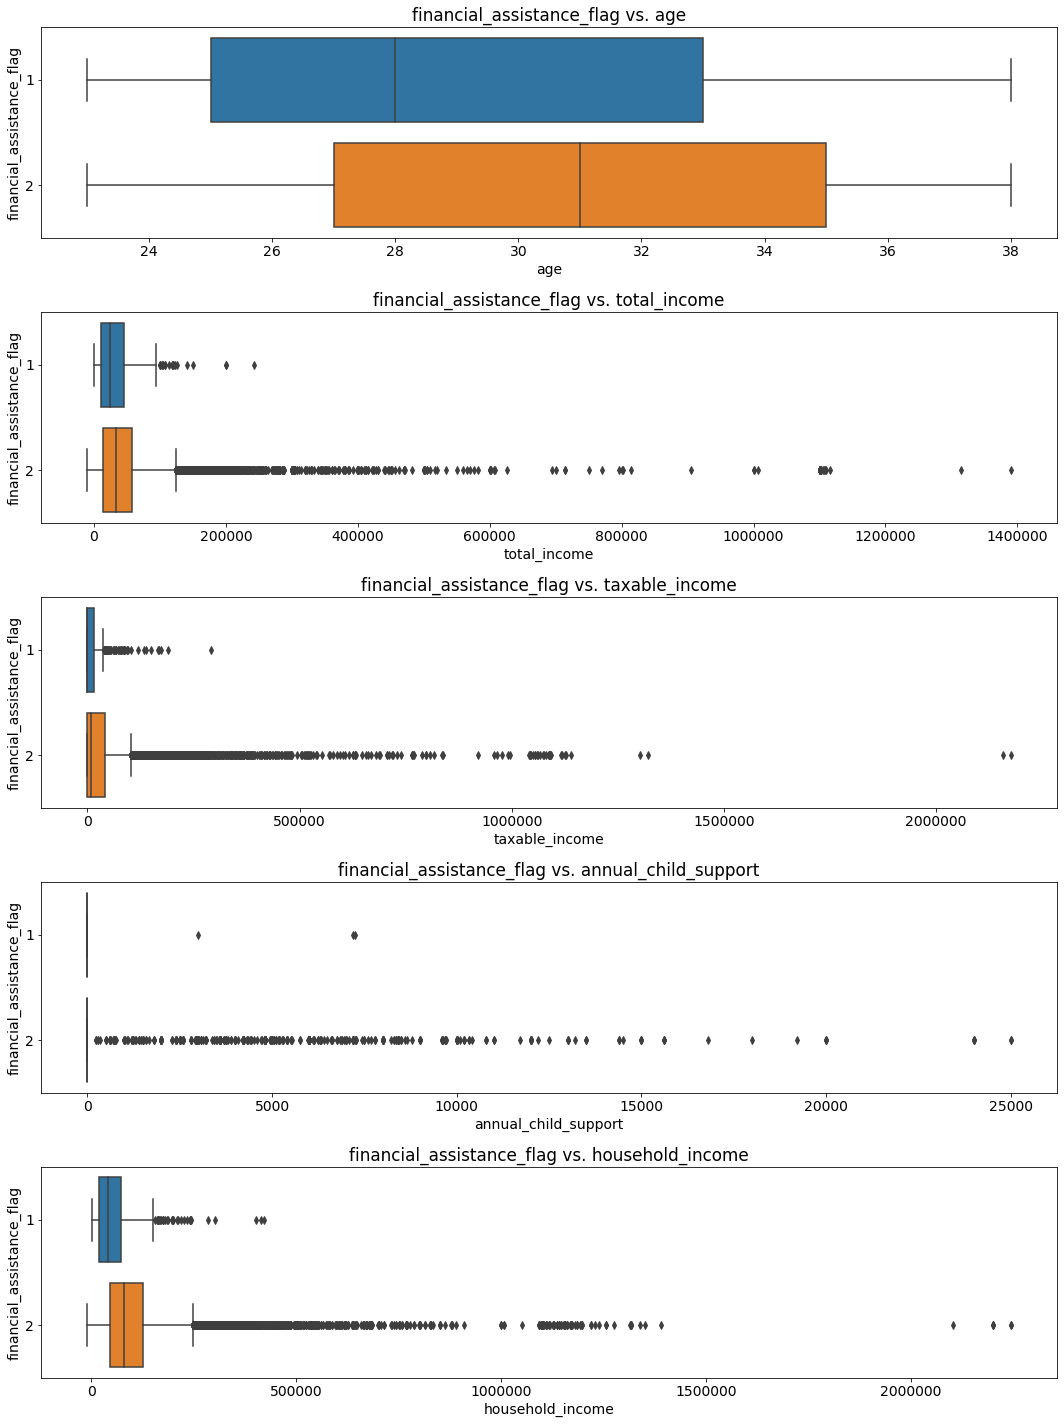

In [15]:
#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(15,20)}) 

#use an index to identify the spot of the subplot
j=1
#plot boxplots of the distribution of each numerical variable 
#against the target variable (financial_assistance_flag)
for k in num_columns: 
    plt.subplot(5,1,j) 
    sns.boxplot(data=millenials, x=k, y='financial_assistance_flag')
    plt.title('financial_assistance_flag vs. %s' %k)
    j=j+1
plt.tight_layout()

#show results    
plt.show()

Our boxplots against the target variable show that the median age for Millennials who require financial assistance is lower than the median age for millennials who do not require financial assistance. This could mean that **age** would be a good predictor for our models.

As expected, for each of the variables related to income, the median income was higher for individuals who did not require financial assistance than for individuals who did require financial assistance.

To better understand the box-plot, since the median for each category is not clear, we will calculate the median for each variable against the target label.

In [16]:
#calculate the median for each column when financial_assistance_flag =1 or =2
#make empty lists to hold the values
median1=[]
median2=[]
diff=[]
#for each column append the median values and difference between them
for k in num_columns:
    median1.append(millenials[millenials['financial_assistance_flag']==1][k].median())
    median2.append(millenials[millenials['financial_assistance_flag']==2][k].median())
    diff.append(millenials[millenials['financial_assistance_flag']==1][k].median() -  
                millenials[millenials['financial_assistance_flag']==2][k].median()) 
df_medians = pd.DataFrame(list(zip(median1, median2, diff)),
                          columns=["financial_assistance_flag = 1 median",
                                   "financial_assistance_flag = 2 median",
                                   "difference"],
                          index=num_columns) 
#print results
df_medians

,financial_assistance_flag = 1 median,financial_assistance_flag = 2 median,difference
age,28.000000,31.000000,-3.000000
total_income,24840.500000,32976.000000,-8135.500000
taxable_income,0.000000,8000.000000,-8000.000000
annual_child_support,0.000000,0.000000,0.000000
household_income,39982.500000,79610.000000,-39627.500000


From the above dataframe, we see that the median taxable income for individuals who received assistance was 0. Based on domain knowledge, this is logical, since people who live below the poverty line often receive any money they have paid in income tax back in the form of a tax refund (i.e. they had no taxable income). 

Unsurprisingly, the median household income for individuals who did not receive financial assistance was nearly twice as high as the median household income for individuals who did receive assistance.

Next, we will calculate the correlation between the numerical variables to evaluate if there could be multicollinearity using them in pairs.

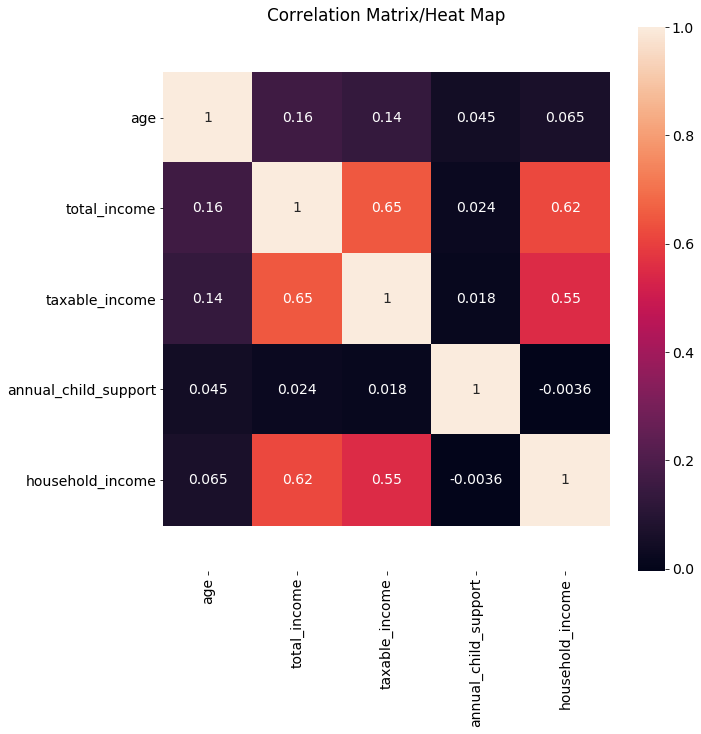

In [17]:
#get correlation matrix between the numeric variables and plot it using seaborn

#set figure size
plt.figure(figsize=(10, 10)) 

#get correlation matrix
corrMatrix = millenials[num_columns].corr() 

#graph correlation matrix
sns.heatmap(corrMatrix, annot=True) 
plt.title('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

We see from the correlation matrix that total_income is highly correlated with taxable_income and household_income. This indicates that we should only use one of these variables in our models.

Next, we will perform the pointbiserial test that will indicate the correlation between binary and numerical variables.

In [18]:
#import pointbiserialr
from scipy.stats import pointbiserialr

#get continuous and dichotomous data
num_col_df = millenials[num_columns]
target = millenials['financial_assistance_flag']

#get pbc of target with each numeric column
pbc=[]
pbc_p_val=[]
#for each column append pbc and o-value to a dedicated list
for col in num_columns:
    pbc.append(pointbiserialr(target, millenials[col])[0])
    pbc_p_val.append(pointbiserialr(target, millenials[col])[1])
#make df with values in lists 
pbc_df = pd.DataFrame(list(zip(pbc, pbc_p_val)),
                      columns=["pbc",
                               "pbc_p_val"],
                      index=num_columns).sort_values(by=['pbc'],ascending=False)
pbc_df

,pbc,pbc_p_val
age,0.060151,0.000000
household_income,0.051874,0.000000
taxable_income,0.033858,0.000000
total_income,0.022770,0.000036
annual_child_support,0.006575,0.233145


From the above pointbiserialr correlation matrix, we see that age, household_income, taxable_income, and total_income all have correlations with an associated p-value of less than .05, indicating they are statistically significant. Since household_income has the largest coefficient we will choose this as the income variable to include. 

Moreover, annual_child_support doesn't seem like a good predictor. 

Now we will look at the categorical variables plotting their bar-plot.

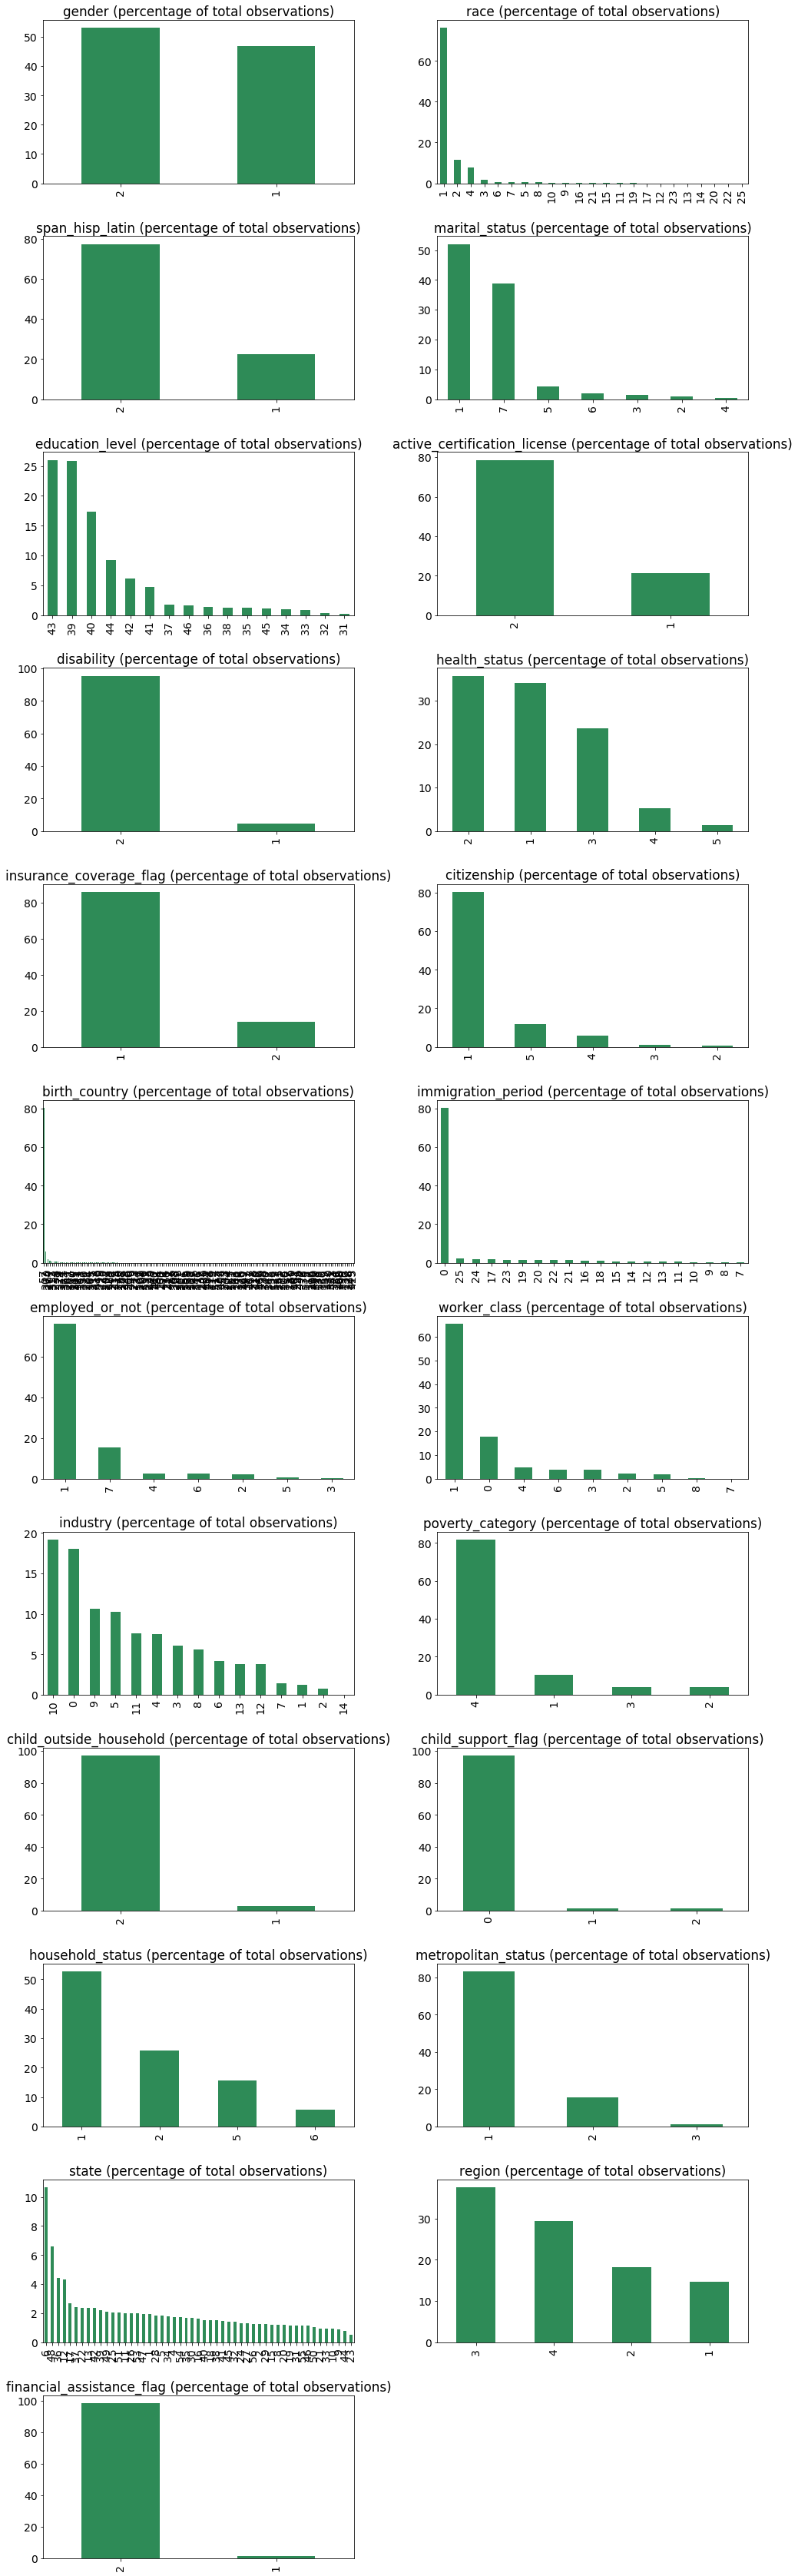

In [19]:
#plot a bar chart for each of our categorical attributes as % of total 

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(15,70)}) 

#use an index to identify the spot of the subplot
j=1
for k in cat_columns:   #for each categorical column 
    plt.subplot(18,2,j) 
    ((millenials[k].value_counts()/len(millenials[k]))*100).plot(kind='bar', color='seagreen');
    plt.title('%s (percentage of total observations)' %k)
    j=j+1 #add 1 to go to the next subplot space
plt.tight_layout()

#show results    
plt.show()

We note the following from the above charts:
- **gender** is nearly balanced
- the most prevalent **race** in the dataset is "only white"
- about 20% of the individuals in the dataset are categorized as **hispanic or latino/a**
- the two categories of **marital_status** which are most prevalent are married and never married
- over 50% of millenials have an **education_level** higher than high school
- the majority of the millennials did not hold an **active_certification**
- there are very few millennials in the dataset who stated they have a **disability**
- very few millennials report having a poor **health_status**
- over 80% of the millennials surveyed reported that they have **insurance_coverage**
- over 80% of the millennials surveyed are United States **citizens**
- there are a large number of **birth country** classes, and many of them are sparse, we will combine these sparse classes later on
- the majority of millennials surveyed did not immigrate to the United States and have an **immigration_period** value of 0
- the most frequent **employed_or_not** value is 1 which represents millennials who are employed at work, and the next most frequent value is 7 which represents individuals not in the work force for other reasons. We believe these might be students.
- the most prevalent **worker_class** is private
- the most prevalent **industry** values are educational and health services, and either unemployed or not in labor force.
- the majority of millennials surveyed are at a **poverty_category** of 4 which means they are at 150 % or more of the poverty level which makes sense since we know that 98.5% of those surveyed did not receive financial assistance.
- over 80% of the survey respondents do not have a **child_outside_household**
- most of the respondents indicated a **child_support_flag** value of 0 which means they do not have a child outside the household, there seems to be an equal distribution between those who do have a child outside the household and are required and not required to pay child support
- the majority of respondents have a **household_status** of either 1 or 2 indicating they are the householder or the spouse of householder
- the majority of millennial respondents have a **metropolitan_status** of 1 indicating they live in a metropolitan area
- due to the large number of **state** classes, it is difficult to make any inferences
- the most frequent **region** was the south, followed by the west

Next, we will combine the classes of the birth_country variable as stated above. We decided to create only two classes, for born in the U.S. and born outside of the U.S.

In [20]:
#combine classes in birth_country
birth_country_combo=[]
for i in millenials['birth_country']:
    if i == 57:
        birth_country_combo.append(1) #1 if born in the US
    else:
        birth_country_combo.append(0) # 0 if born outside the US
millenials['birth_country']=birth_country_combo

#change data type to category
millenials['birth_country'] = millenials['birth_country'].astype('category')

Next, we will generate side by side barplots of all the categorical variables against the target.

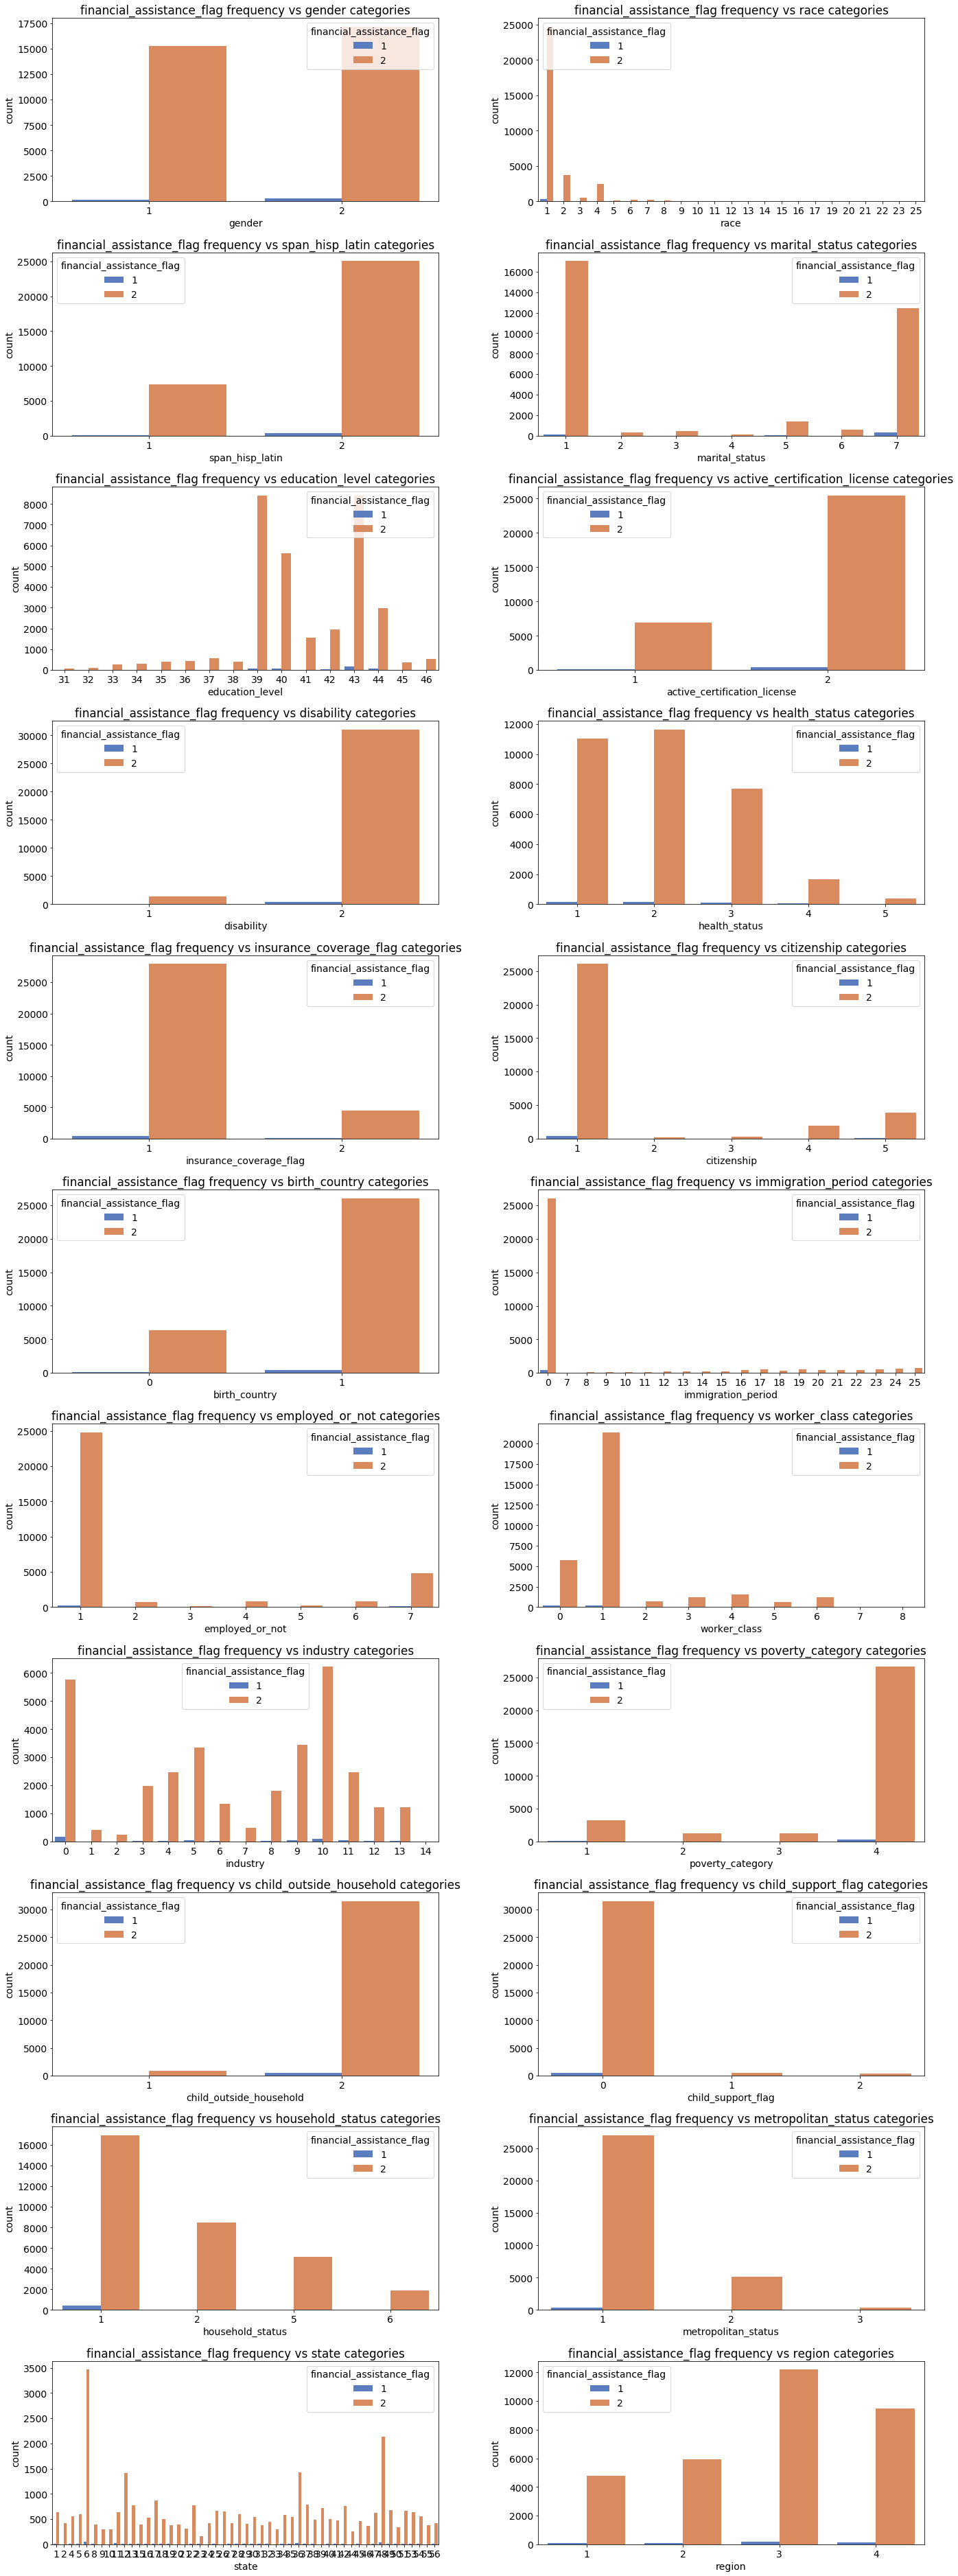

In [21]:
#set color palette for charts
sns.set_palette("muted")

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,85)}) 

j=1
for k in cat_columns[:-1]:   #for each variable 
    plt.subplot(18,2,j) 
    sns.countplot(x=k, hue="financial_assistance_flag",data=millenials)
    plt.title('financial_assistance_flag frequency vs %s categories' %k)
    j=j+1
plt.tight_layout()

#show results
plt.show()

From the above, several of the variables seem to be good predictors for our target variable. For example, a household_status of 2(spouse), 5(child of householder), or 6(other relative), would mean that the individual did not receive financial assistance.  Additionally a marital_status other than 1 (married with a civilian spouse), 5 (divorced), or 7 (never married) means an individual did not receive financial assistance.

Next, we will perform the chi-square test of independence to see if there are any good predictors.

In [22]:
#import module to perform chi-square
from scipy import stats

#create a data frame with the categorical variables
cat_df = millenials[cat_columns]

#create list to save chi-square test results
chi_sq=[]

#iterate over the categorical explanatory variables
for i in range(len(cat_columns[:-1])):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(cat_df.financial_assistance_flag, cat_df.iloc[:,i]))[0:2],cat_columns[i]])

#sort results
chi_sq.sort(reverse=True)

#put results in a dataframe
chi_sq_df = pd.DataFrame(chi_sq,columns=['Chi_Sq_Value , P_value','Variable'])
chi_sq_df

,"Chi_Sq_Value , P_value",Variable
0,"(227.2887087281462, 2.9012983563992846e-46)",marital_status
1,"(219.06234778635465, 3.201906369228499e-47)",household_status
2,"(172.49397855028516, 3.6832543328209277e-37)",poverty_category
3,"(146.34285735127781, 4.587483568033426e-29)",employed_or_not
4,"(135.99321154341743, 2.0063325731540737e-18)",race
5,"(119.46169848714156, 8.0202841935551955e-19)",industry
6,"(117.45233226121657, 1.1124024270121772e-21)",worker_class
7,"(72.79942714688742, 5.8166579847963734e-15)",health_status
8,"(68.77216817063602, 0.04022167981842378)",state
9,"(58.97997645421151, 5.604634580640819e-06)",immigration_period


From the results above, we can see that marital_status, household_status, poverty_category and employed_or_not have the highest chi square values and low p-values, indicating they are good predictors. 

Next, we will look at the information gain for classifying our target variable from each of our explanatory variables (the decrease in entropy of the target variable after a split on an explanatory variable).

In [23]:
#import module to calculate information gain
from sklearn.feature_selection import mutual_info_classif

#make dict with information gain for each explanantory variable
#use original data frame which had all categorical variables encoded as integers
info_gain = dict(zip(millenials_data.iloc[:,:-1].columns.to_list(),
                     mutual_info_classif(millenials_data.iloc[:,:-1], 
                                         millenials_data.financial_assistance_flag, 
                                         discrete_features=True)
                    ))

#create a data frame to display the results and sort them
info_gain_df = pd.DataFrame.from_dict(info_gain, orient='index', columns=['Mutual_Information'])
info_gain_df = info_gain_df.sort_values('Mutual_Information',ascending=False)
info_gain_df

,Mutual_Information
household_income,0.057900
total_income,0.050996
taxable_income,0.025689
household_status,0.003807
marital_status,0.003592
birth_country,0.002878
age,0.002130
poverty_category,0.001999
employed_or_not,0.001849
industry,0.001654


From the above, household_income has the highest information gain, as we would expect from our earlier EDA work. The other income related variables also have a high information gain, however, since they are correlated with household_income, we will not be using them in our models. 

Household_status, marital_status, and age all have a decent level of information gain, and we have seen earlier that these variables should be good predictors.

While birth_country seems to have a decent level of information gain, it was not significant from the chi-square test, and therefore we will not include it in our models.  

Poverty_category had a lower information gain than birth_country, however, it had a high chi-square value and a signficant p-value, therefore it seems like a good variable to include.

## Data Preparation

In this section we will combine sparse and/or related classes in some of the explanatory variables, recode the values of variables that only have two classes to 0's and 1's, and standardize the numerical variables.

In [24]:
#combining sparse classes in some of the categorical variables

#create new copy of our df which will hold combined sparse classes is several columns
millenials_combo=millenials.copy()

#combine classes in race
race_combo=[]
for i in millenials['race']:
    if i in (1,2,3,4,5):
        race_combo.append(i) #not mixed race
    else:
        race_combo.append(999) #mixed race classes
millenials_combo['race'] = race_combo

#combine classes in marital_status
marital_status_combo=[]
for i in millenials['marital_status']:
    if i == 7:
        marital_status_combo.append(0) #never married
    else:
        marital_status_combo.append(1) #married now or before
millenials_combo['marital_status']=marital_status_combo

#combine classes in education_level
education_level_combo=[]
for i in millenials['education_level']:
    if i <= 39:
        education_level_combo.append(0) #up to high school
    elif i in (40,41,42,43,45):
        education_level_combo.append(1) #up to bachelor/vocational/professional
    else:
        education_level_combo.append(2) #graduate level education or above
millenials_combo['education_level']=education_level_combo

#combine classes in citizenship
citizenship_combo=[]
for i in millenials['citizenship']:
    if i in (1,2,3,4):
        citizenship_combo.append(1) #US citizen
    else:
        citizenship_combo.append(0) #not US citizen
millenials_combo['citizenship']=citizenship_combo

#combine classes in poverty category
povertylev_combo=[]
for i in millenials['poverty_category']:
    if i == 1:
        povertylev_combo.append(1) #below poverty level
    else:
        povertylev_combo.append(0) #above poverty level
millenials_combo['poverty_category']=povertylev_combo

#combine classes in household status
household_combo=[]
for i in millenials['household_status']:
    if i in (1,2):
        household_combo.append(1) #householder or spouse
    else:
        household_combo.append(0) #other household relative
millenials_combo['household_status']=household_combo

In [25]:
#recode categorical variables with two classes into binary variables

#recode target 
financial_assistance_flag_recode=[]
for i in millenials['financial_assistance_flag']:
    if i == 1:
        financial_assistance_flag_recode.append(1) #received financial assistance
    else:
        financial_assistance_flag_recode.append(0) #did not receive financial assistance
millenials_combo['financial_assistance_flag']=financial_assistance_flag_recode

#recode gender
gender_recode=[]
for i in millenials['gender']:
    if i == 1:
        gender_recode.append(1) #male
    else:
        gender_recode.append(0) #female
millenials_combo['gender']=gender_recode

#recode span_hisp_latin
span_hisp_latin_recode=[]
for i in millenials['span_hisp_latin']:
    if i == 1:
        span_hisp_latin_recode.append(1) #spanish, hispanic, or latinx
    else:
        span_hisp_latin_recode.append(0) #not spanish, hispanic, or latinx
millenials_combo['span_hisp_latin']=span_hisp_latin_recode

#recode active_certification_license
active_certification_license_recode=[]
for i in millenials['active_certification_license']:
    if i == 1:
        active_certification_license_recode.append(1) #has certificate
    else:
        active_certification_license_recode.append(0) #does not have certificate
millenials_combo['active_certification_license']=active_certification_license_recode

#recode disability
disability_recode=[]
for i in millenials['disability']:
    if i == 1:
        disability_recode.append(1) #has disability
    else:
        disability_recode.append(0) #does not have disability
millenials_combo['disability']=disability_recode

#recode insurance_coverage_flag
insurance_coverage_flag_recode=[]
for i in millenials['insurance_coverage_flag']:
    if i == 1:
        insurance_coverage_flag_recode.append(1) #has insurance coverage
    else:
        insurance_coverage_flag_recode.append(0) #does not have insurance coverage
millenials_combo['insurance_coverage_flag']=insurance_coverage_flag_recode

#recode child_outside_household
child_outside_household_recode=[]
for i in millenials['child_outside_household']:
    if i == 1:
        child_outside_household_recode.append(1) #has child outside household
    else:
        child_outside_household_recode.append(0) #does not have child outside household
millenials_combo['child_outside_household']=child_outside_household_recode

In [26]:
#standardize numerical variables using MinMaxScaler

#import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#pick columns to standardize in a new df
millenials_num_std = millenials[num_columns]

#define scaler 
scaler = MinMaxScaler()
#fit and transform data
scaler.fit(millenials_num_std)
millenials_num_std = scaler.transform(millenials_num_std)

#change data into data frame format
millenials_num_std = pd.DataFrame(millenials_num_std, columns = num_columns)

#show results
millenials_num_std.head()

,age,total_income,taxable_income,annual_child_support,household_income
0,0.933333,0.015714,0.000000,0.000000,0.014519
1,0.666667,0.042856,0.000000,0.000000,0.026707
2,0.666667,0.024287,0.000002,0.000000,0.015086
3,0.400000,0.007143,0.000000,0.000000,0.015086
4,0.733333,0.038256,0.033041,0.000000,0.046982


In [27]:
#add standardized columns to frame with combined sparse classes
millenials_combo[num_columns] = millenials_num_std[num_columns].copy()

#show results
millenials_combo.head()

,age,gender,race,span_hisp_latin,marital_status,education_level,active_certification_license,disability,health_status,insurance_coverage_flag,citizenship,birth_country,immigration_period,employed_or_not,worker_class,industry,total_income,taxable_income,poverty_category,child_outside_household,child_support_flag,annual_child_support,household_status,metropolitan_status,state,region,household_income,financial_assistance_flag
0,0.933333,1,1,0,0,0,0,0,3,0,1,1,0,1,1,10,0.015714,0.000000,0,0,0,0.000000,0,2,23,1,0.014519,0
1,0.666667,1,999,0,1,0,0,0,3,0,1,1,0,1,6,3,0.042856,0.000000,0,0,0,0.000000,1,2,23,1,0.026707,0
2,0.666667,1,1,0,1,1,0,0,2,1,1,1,0,1,1,5,0.024287,0.000002,1,0,0,0.000000,1,2,23,1,0.015086,0
3,0.400000,0,1,0,1,1,0,0,3,1,1,1,0,7,0,0,0.007143,0.000000,1,0,0,0.000000,1,2,23,1,0.015086,0
4,0.733333,0,1,0,1,1,1,0,2,1,1,1,0,1,1,10,0.038256,0.033041,0,0,0,0.000000,1,2,23,1,0.046982,0


## Prepped Data Review

Next we will review the side-by-side barplots of variables we altered, and re-evaluate our variables using both chi-square and information gain to choose the explanatory variables for the models.

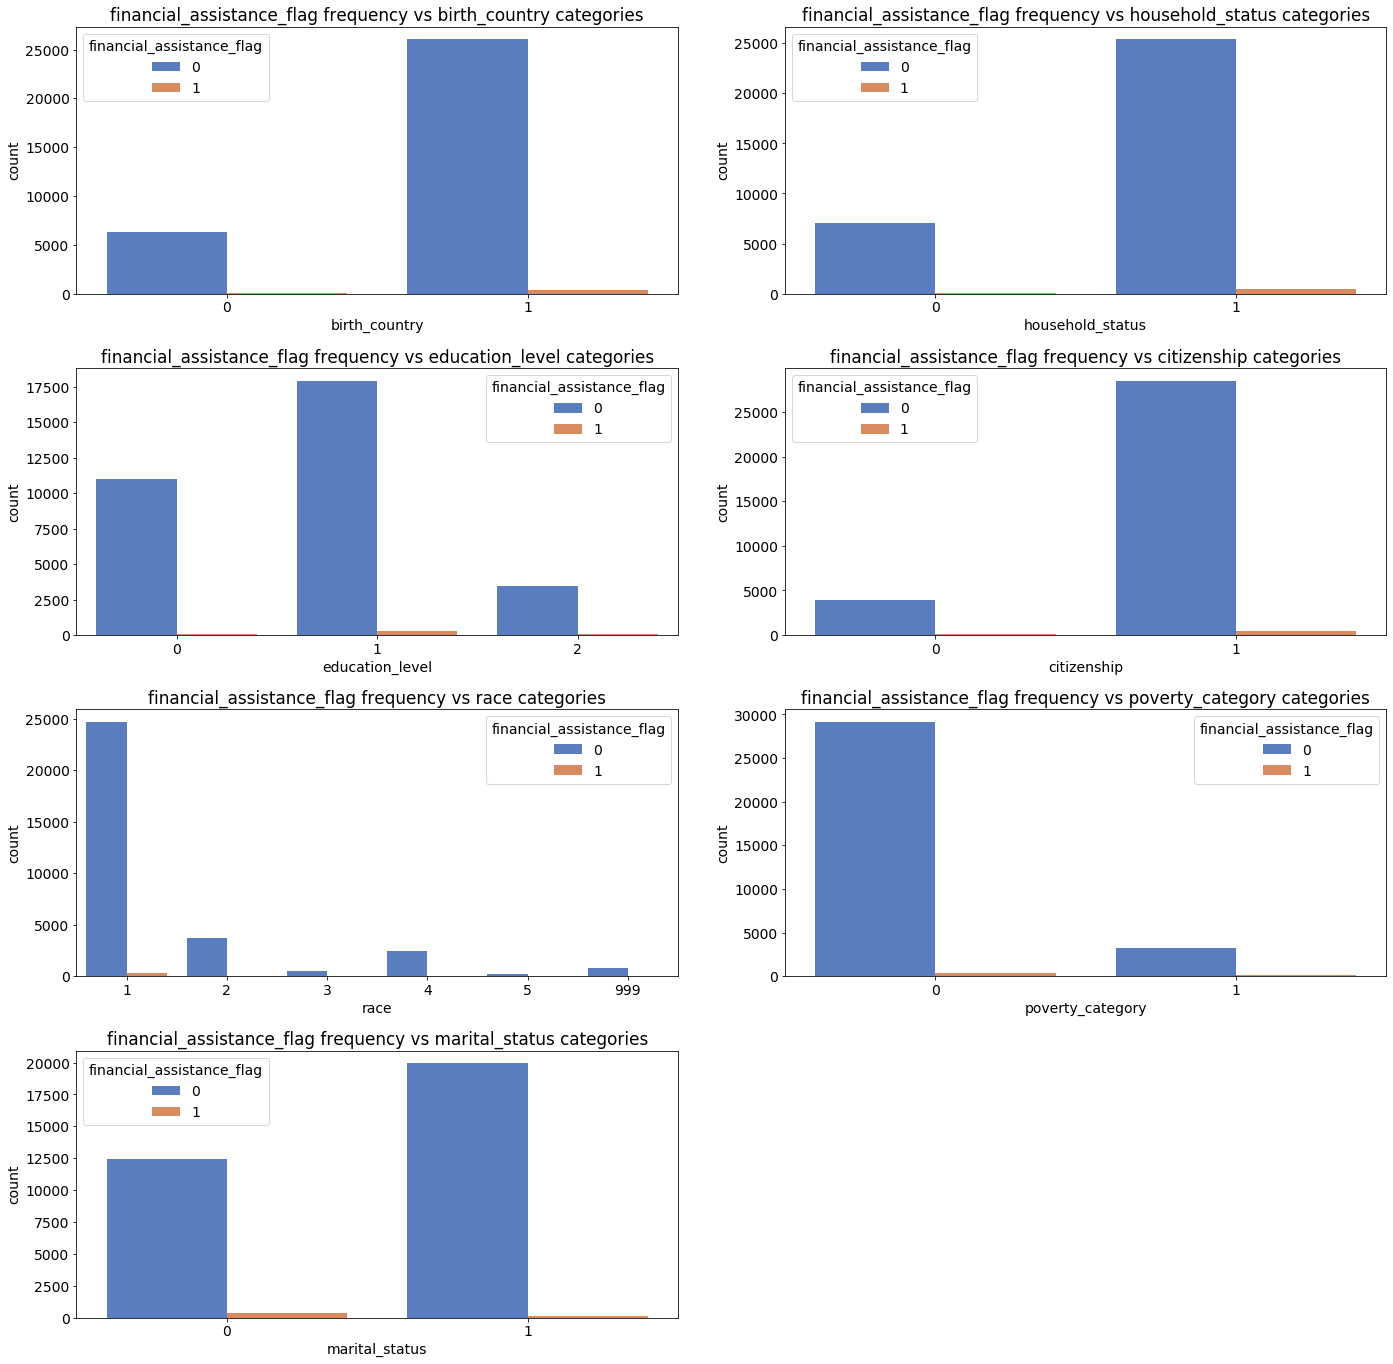

In [28]:
#set color palette for charts
sns.set_palette("muted")

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,85)}) 

changed_variables = ['birth_country', 'household_status', 'education_level', 'citizenship', 'race',
                     'poverty_category', 'marital_status']

j=1
for k in millenials_combo[changed_variables]:   #for each variable 
    plt.subplot(18,2,j) 
    sns.countplot(x=k, hue="financial_assistance_flag",data=millenials_combo)
    plt.title('financial_assistance_flag frequency vs %s categories' %k)
    j=j+1
plt.tight_layout()

#show results
plt.show()

From the above side by side bar plots, it doesn't look like these variables have clear predictive abilities.

Next, we will again perform the chi-square test of independence to see if there are any good predictors.

In [29]:
#create a data frame with the categorical variables
cat_df2 = millenials_combo[cat_columns]

#create list to save chi-square test results
chi_sq2=[]

#iterate over the categorical explanatory variables
for i in range(len(cat_columns[:-1])):
    chi_sq2.append([stats.chi2_contingency(pd.crosstab(cat_df2.financial_assistance_flag, cat_df2.iloc[:,i]))[0:2],cat_columns[i]])

#sort results
chi_sq2.sort(reverse=True)

#put results in a dataframe
chi_sq_df2 = pd.DataFrame(chi_sq2,columns=['Chi_Sq_Value , P_value','Variable'])
chi_sq_df2

,"Chi_Sq_Value , P_value",Variable
0,"(193.64029429469613, 5.102370670039327e-44)",marital_status
1,"(150.55035209244764, 1.3142176136171985e-34)",poverty_category
2,"(146.34285735127781, 4.587483568033426e-29)",employed_or_not
3,"(119.46169848714159, 8.020284193555076e-19)",industry
4,"(117.45233226121658, 1.1124024270121609e-21)",worker_class
5,"(81.7369381490015, 1.5546063366913597e-19)",household_status
6,"(72.79942714688741, 5.816657984796416e-15)",health_status
7,"(68.77216817063601, 0.040221679818423894)",state
8,"(58.97997645421151, 5.604634580640819e-06)",immigration_period
9,"(41.25006572594628, 1.3394734191701762e-10)",disability


From the chi-square results we see that marital_status, household_status, poverty_category and employed_or_not still have significant chi-square values. Both industry and worker_class now also have high chi-square values.

Now we will look at the information gain.

In [30]:
#calculate information gain on new dataframe

#change data type of all categorical variables to int
millenials_combo_int = millenials_combo
for col in cat_columns:
    millenials_combo_int[col] = millenials_combo_int[col].astype('int')

#make dict with information gain for each explanantory variable
#use original data frame which had all categorical variables encoded as integers
info_gain2 = dict(zip(millenials_combo_int.iloc[:,:-1].columns.to_list(),
                     mutual_info_classif(millenials_combo_int.iloc[:,:-1], 
                                         millenials_combo_int.financial_assistance_flag, 
                                         discrete_features=True)
                    ))

#create a data frame to display the results and sort them
info_gain_df2 = pd.DataFrame.from_dict(info_gain2, orient='index', columns=['Mutual_Information'])
info_gain_df2 = info_gain_df.sort_values('Mutual_Information',ascending=False)
info_gain_df2

,Mutual_Information
household_income,0.057900
total_income,0.050996
taxable_income,0.025689
household_status,0.003807
marital_status,0.003592
birth_country,0.002878
age,0.002130
poverty_category,0.001999
employed_or_not,0.001849
industry,0.001654


From the above, household_income still has the highest information gain. The other income related variables also have a high information gain, however, since they are correlated with household_income, as stated previously, we will not be using them in our models.

Household_status, marital_status, both in which we combined classes, still have a decent level of information gain.

As stated previously, age also has a relatively high level information gain.

While birth_country seems to have a decent level of information gain, it was not significant from the chi-square test, and therefore we will not include it in our models.

Poverty_category had a lower information gain than birth_country, however, it still has a high chi-square value and a signficant p-value, therefore it seems like a good variable to include.

We note that employed_or_not has a decent information gain value and also a signficant chi-square test result, however, since we would like to control overfitting, we will use up to 5 variables in our models. 

## Classifier Modeling

**Feature Selection**

Based on the findings in our EDA and data prep review, we will select the following variables as predictors in our models:

- household_income
- age
- household_status
- poverty_category
- marital_status

As stated above, the models that we are going to create are:
- Binary Logistic Regression
- Random Forest
- KNN

After we compare the results of the models, and choose the best model between the three, we will apply it to our test data. 

We will then construct an Ensemble model that will combine the previous three models. We chose to use a stacking Ensemble model which is appropriate for classification models and slightly more sophisticated than a voting Ensemble model.

Next we will split our data into training and testing subsets.

In [31]:
#load train_test_split from scikit learn
from sklearn.model_selection import train_test_split 

#create the list of the explanatory variables selected above
explanatory=['household_income','poverty_category','household_status','age','marital_status']

#save the explanatory variables into a new df and the target inside a series
x=millenials_combo_int[explanatory].copy()
y=millenials_combo_int.financial_assistance_flag

#create train and test using the stratify method on the target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0,stratify=y)

#check shape
x_train.shape

(26306, 5)

Since our target variable is extremely imbalanced, we decided to oversample our training dataset using the SMOTE technique. This approach has been shown to improve results on datasets with imbalanced target variables.

In [32]:
#import SMOTE
from imblearn.over_sampling import SMOTE

#SMOTE
os = SMOTE(random_state=0)

#define train columns
columns = x_train.columns

#split and balance the data 
os_data_x, os_data_y = os.fit_resample(X=x_train, y=y_train)

#change the data into a dataframe
os_data_x = pd.DataFrame(data=os_data_x,columns=columns)

#check that the target is balanced
os_data_y.value_counts()

1    25919
0    25919
Name: financial_assistance_flag, dtype: int64

## Binary Logistic Regression

Since our training dataset contains only continuous and/or binary variables we don't need to use any dummies or change any hyperparameters for this model. 

In [33]:
#import the packages that we need to create the model and the evaluate it
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import itertools

#set and fit the model
model_logreg = LogisticRegression().fit(os_data_x, os_data_y)

#make the predictions on our train dataset
logreg_pred=model_logreg.predict(os_data_x)

Next we will check the p-value of the coefficients to make sure that the variables we chose to use in our models are statistically significant.

In [34]:
import statsmodels.api as sm

#create our x to be used in the model based on the variables selected earlier
x1 = os_data_x.copy()

#add constant
x1 = sm.add_constant(x1)

#define the model type as logistic regression
results = sm.Logit(os_data_y,x1).fit()

#print summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.553988
         Iterations 6
                               Logit Regression Results                              
Dep. Variable:     financial_assistance_flag   No. Observations:                51838
Model:                                 Logit   Df Residuals:                    51832
Method:                                  MLE   Df Model:                            5
Date:                       Thu, 13 Aug 2020   Pseudo R-squ.:                  0.2008
Time:                               18:41:47   Log-Likelihood:                -28718.
converged:                              True   LL-Null:                       -35931.
Covariance Type:                   nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3792      0.040  

We see from above that the p-value of each of our coefficients is close to zero, indicating the variables we chose are statistically significant.

Our coefficients tell us that there is a negative relationship between household income and needing financial assistance. The same is true for age and marital status. Poverty_category and household_status have a positive relationship with our target variable. 

Now we will evaluate the results of the logistic regression model on the training dataset. We will start by plotting a confusion matrix.

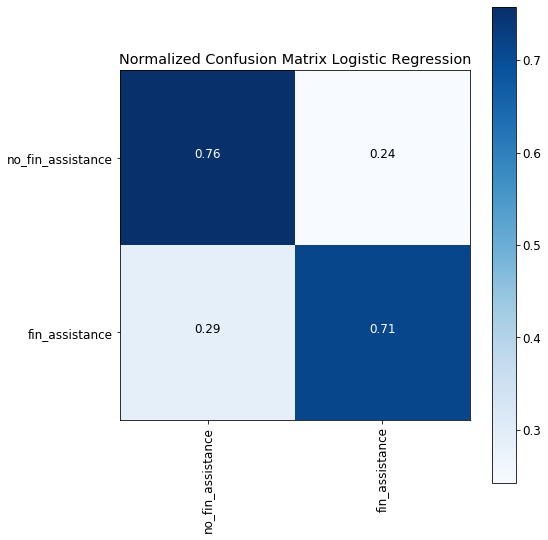

In [35]:
#save the confusion matrix
conf_mat = confusion_matrix(os_data_y,logreg_pred)

#transform the count values into proportions
cm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

#make a list of possible classes in the target variable in the order they were encoded.
classes = ['no_fin_assistance','fin_assistance']

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.rcParams.update({'font.size': 12})

#plot the matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix Logistic Regression')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()

As we can see from the above confusion matrix, the model was able to predict both categories.

Next we will cross-validate our results using 5 folds to validate since our sample size is sufficiently large. We decided not to use 10 folds for efficiency.

In [36]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cv_res_accuracy_logreg = cross_val_score(model_logreg, os_data_x, os_data_y, cv=5,scoring='accuracy')
cv_res_precision_logreg = cross_val_score(model_logreg, os_data_x, os_data_y, cv=5,scoring='precision')
cv_res_recall_logreg = cross_val_score(model_logreg, os_data_x, os_data_y, cv=5,scoring='recall')
cv_res_f1_logreg = cross_val_score(model_logreg, os_data_x, os_data_y, cv=5,scoring='f1')

#print results
print("Cross validated metrics for Logistic Regression")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cv_res_accuracy_logreg),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cv_res_precision_logreg),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cv_res_recall_logreg),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cv_res_f1_logreg),4))

Cross validated metrics for Logistic Regression
The average Accuracy score for the 5 folds was:  0.7353
The average Precision score for the 5 folds was:  0.7465
The average Recall score for the 5 folds was:  0.7125
The average F1 score for the 5 folds was:  0.7291


We can see that the model predicted the target variable of the training set with an accuracy higher than 0.5 which would have been the case of randomly choosing one category for all the observations. Additionally, the other metrics are around 0.7 which is a good result.

Next, we will create the Random Forest Model.

## Random Forest

To help decide which hyperparameters to use in our model we referenced [this article](https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752). We will first look to see whether entropy or gini will yield the best results, and also look to see what max depth gives us the maximum cross-validated recall.

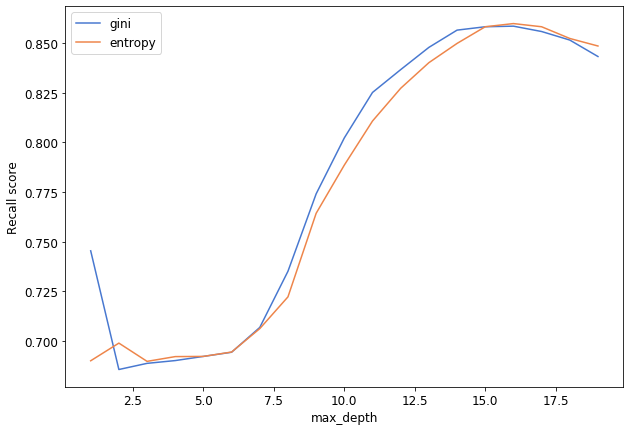

In [37]:
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#create empty lists to store the values from our for loop
max_depth_rfc = []
rec_gini_rfc = []
rec_entropy_rfc = []

#for each iteration, train the random forest model using gini and then entropy with depth i
#and gather cross-validated accuracy scores for each max depth and criterion
for i in range(1,20):
    rfc = RandomForestClassifier(criterion='gini', max_depth=i)
    rfc.fit(x_train, y_train)
    rec_gini_rfc.append(round(np.mean(cross_val_score(rfc, os_data_x, os_data_y, cv=5, scoring='recall')),4))

    rfc = RandomForestClassifier(criterion='entropy', max_depth=i)
    rfc.fit(x_train, y_train)
    rec_entropy_rfc.append(round(np.mean(cross_val_score(rfc, os_data_x, os_data_y, cv=5, scoring='recall')),4))

    max_depth_rfc.append(i)
    
#create a dataframe with the values from our lists above so that we can visualize our results
df_rfc = pd.DataFrame({'recall_gini_rfc':pd.Series(rec_gini_rfc), 
                       'recall_entropy_rfc':pd.Series(rec_entropy_rfc),
                       'max_depth_rfc':pd.Series(max_depth_rfc)})

#set figure size
plt.figure(figsize=(10,7)) 
#visualize changes in parameters
plt.plot('max_depth_rfc','recall_gini_rfc', data=df_rfc, label='gini')
plt.plot('max_depth_rfc','recall_entropy_rfc', data=df_rfc, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('Recall score')
plt.legend()
plt.show();

In [38]:
#find chosen max_depth and chosen criterion
depth_entropy_rfc = df_rfc[df_rfc['recall_entropy_rfc'] == df_rfc['recall_entropy_rfc'].max()].max_depth_rfc.iloc[0]
depth_gini_rfc = df_rfc[df_rfc['recall_gini_rfc'] == df_rfc['recall_gini_rfc'].max()].max_depth_rfc.iloc[0]

if df_rfc['recall_entropy_rfc'].max() > df_rfc['recall_gini_rfc'].max():
    chosen_criterion_rfc = 'entropy'
    chosen_depth_rfc = depth_entropy_rfc
else:
    chosen_criterion_rfc = 'gini'
    chosen_depth_rfc = depth_gini_rfc

#print chosen parameters
print("chosen max_depth is: {} , chosen criterion is: {}"
      .format(chosen_depth_rfc,chosen_criterion_rfc))

#print rows with max acc for each criterion    
e_rfc = df_rfc[df_rfc['recall_entropy_rfc'] == df_rfc['recall_entropy_rfc'].max()]    
g_rfc = df_rfc[df_rfc['recall_gini_rfc'] == df_rfc['recall_gini_rfc'].max()]
eg_df_rfc = pd.concat([e_rfc,g_rfc])
eg_df_rfc

chosen max_depth is: 16 , chosen criterion is: entropy


,recall_gini_rfc,recall_entropy_rfc,max_depth_rfc
15,0.858600,0.859900,16
15,0.858600,0.859900,16


We will use the hyperparameters we found to have the highest recall to create our model.

In [39]:
#set and fit the model using the same set of variables
random_forest_model = RandomForestClassifier(criterion=chosen_criterion_rfc, max_depth=chosen_depth_rfc)
random_forest_model.fit(os_data_x, os_data_y)

#generate predictions based on the train set
random_forest_pred = random_forest_model.predict(os_data_x)

Next we will plot a confusion matrix for our Random Forest model results.

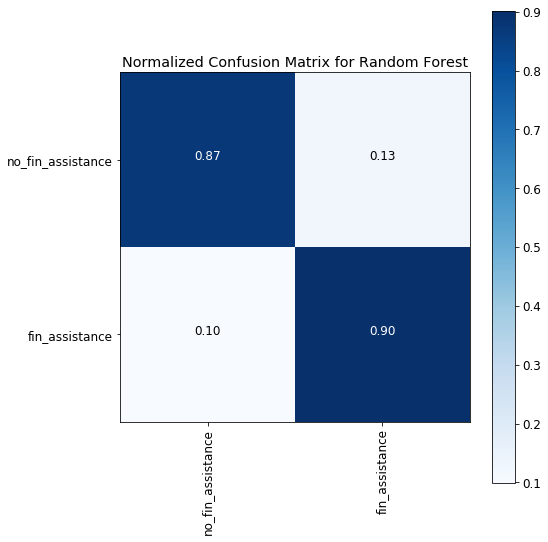

In [40]:
#save the confusion matrix
conf_mat2 = confusion_matrix(os_data_y,random_forest_pred)

#transform the count values into proportions
cm2 = conf_mat2.astype('float') / conf_mat2.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.rcParams.update({'font.size': 12})

#plot the matrix
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for Random Forest')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm2.max() / 2.

for i, j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
        plt.text(j, i, format(cm2[i, j], fmt),horizontalalignment="center",
                 color="white" if cm2[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()

As we can see from the confusion matrix, the Random Forest model predicts the two classes better than the Logistic Regression model did.

Next we will cross-validate the model and evaluate the performance.

In [41]:
#use k-fold cross validation, since our sample size is sufficiently large, a 5-fold validation is appropriate
cv_res_accuracy_rf = cross_val_score(random_forest_model, os_data_x, os_data_y, cv=5, scoring='accuracy')
cv_res_precision_rf = cross_val_score(random_forest_model, os_data_x, os_data_y, cv=5, scoring='precision')
cv_res_recall_rf = cross_val_score(random_forest_model, os_data_x, os_data_y, cv=5, scoring='recall')
cv_res_f1_rf = cross_val_score(random_forest_model, os_data_x, os_data_y, cv=5, scoring='f1')

#print results
print("Cross validated metrics for Random Forest Model")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cv_res_accuracy_rf),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cv_res_precision_rf),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cv_res_recall_rf),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cv_res_f1_rf),4))

Cross validated metrics for Random Forest Model
The average Accuracy score for the 5 folds was:  0.8468
The average Precision score for the 5 folds was:  0.8376
The average Recall score for the 5 folds was:  0.8593
The average F1 score for the 5 folds was:  0.8493


As we can see from the above results, the Random Forest model performs better than the Logistic Regression. 

Next, we will create a KNN model.

## KNN Model

We will use cross-validation to find the optimal number of K-nearest neighbors for our KNN model. Since recall is our chosen metric of interest, we decided to choose the K value that generates the maximum recall score.

We will use five folds to do the cross validation since our training set is sufficiently large.

In [42]:
#choose optimal K value for our model:
#load KNeighborsClassifier from scikit learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#create list to hold the mean of the accuracy score per each K
recall = [] 
#might take some time, we are not using the sqrt of the number of observation because it is too large
#this won't only be extremely long but also in case chosen would generate overfitting
for k in range(1,50):
    model1 = KNeighborsClassifier(n_neighbors=k)
    cross_val_results_rec = cross_val_score(model1, os_data_x, os_data_y, cv=5,scoring='recall')
    recall.append(cross_val_results_rec.mean())

In [43]:
#save the K with the maximum recall-score.
#the K equals to the index in the list +1, since the list index starts from 0 but referres to k=1
best_k=recall.index(max(recall))+1

rec_best_k=max(recall)

print('The best number of K to use for this model is:',best_k,
      '\n The value of the Recall score for this particular K is:', round(rec_best_k,4))

The best number of K to use for this model is: 19 
 The value of the Recall score for this particular K is: 0.8463


Next, we will use the chosen K in our KNN model.

In [44]:
#specify the model
knn_model = KNeighborsClassifier(n_neighbors=best_k)

#fit the model
knn_model.fit(os_data_x, os_data_y)

#save the prediction made using the train
predict_knn=knn_model.predict(os_data_x)

Next we will plot a confusion matrix for our KNN model.

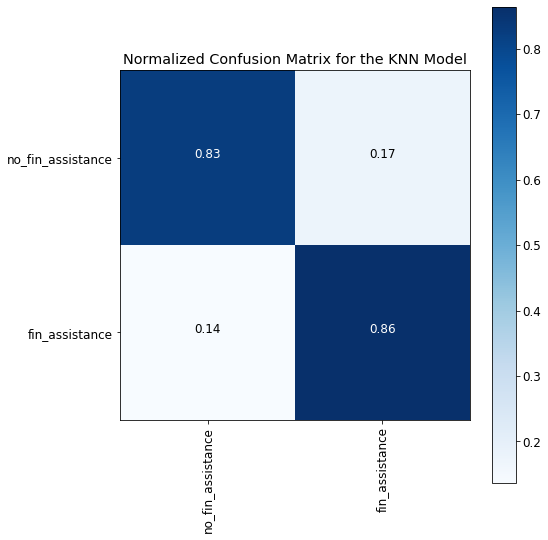

In [45]:
#save the confusion matrix
conf_mat3 = confusion_matrix( os_data_y,predict_knn)

#transform the count values into proportions
cm3 = conf_mat3.astype('float') / conf_mat3.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.rcParams.update({'font.size': 12})

#plot the matrix
plt.imshow(cm3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for the KNN Model')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm3.max() / 2.

for i, j in itertools.product(range(cm3.shape[0]), range(cm3.shape[1])):
        plt.text(j, i, format(cm3[i, j], fmt),horizontalalignment="center",
                 color="white" if cm3[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()

As we can see from the confusion matrix, the model seems to have performed as well as the Random Forest. We will now cross-validate the model and evaluate the performance.

In [46]:
#use k-fold cross validation
cv_res_recall_knn = cross_val_score(knn_model, os_data_x, os_data_y, cv=5,scoring='recall')
cv_res_accuracy_knn = cross_val_score(knn_model, os_data_x, os_data_y, cv=5,scoring='accuracy')
cv_res_precision_knn = cross_val_score(knn_model, os_data_x, os_data_y, cv=5,scoring='precision')
cv_res_f1_knn = cross_val_score(knn_model, os_data_x, os_data_y, cv=5,scoring='f1')

#print results
print("Cross validated metrics for KNN Model")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cv_res_accuracy_knn),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cv_res_recall_knn),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cv_res_precision_knn),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cv_res_f1_knn),4))

Cross validated metrics for KNN Model
The average Accuracy score for the 5 folds was:  0.8234
The average Recall score for the 5 folds was:  0.8463
The average Precision score for the 5 folds was:  0.8092
The average F1 score for the 5 folds was:  0.8273


From the results, we can see that the model performed well on all the metrics.

## Model Selection

Next, we will create a table to compare all the results of our three ML models.

In [47]:
#summary of comparison between models
summary_df = pd.DataFrame(np.array([['5',
                                     round(np.mean(cv_res_accuracy_logreg),4),
                                     round(np.mean(cv_res_precision_logreg),4),
                                     round(np.mean(cv_res_recall_logreg),4),                                     
                                     round(np.mean(cv_res_f1_logreg),4)
                                     ],
                                    ['5',
                                     round(np.mean(cv_res_accuracy_rf),4),
                                     round(np.mean(cv_res_precision_rf),4),
                                     round(np.mean(cv_res_recall_rf),4),                                     
                                     round(np.mean(cv_res_f1_rf),4)
                                     ],
                                    ['5',
                                     round(np.mean(cv_res_accuracy_knn),4),
                                     round(np.mean(cv_res_precision_knn),4),
                                     round(np.mean(cv_res_recall_knn),4),                                     
                                     round(np.mean(cv_res_f1_knn),4)
                                     ]
                                   ]),
                          columns=['Variables in Model','Accuracy',
                                   'Precision', 'Recall', 'F1'],
                          index=['Logistic Regression', 'Random Forest',
                                 'KNN Model'])

#print results
summary_df

,Variables in Model,Accuracy,Precision,Recall,F1
Logistic Regression,5,0.7353,0.7465,0.7125,0.7291
Random Forest,5,0.8468,0.8376,0.8593,0.8493
KNN Model,5,0.8234,0.8092,0.8463,0.8273


Looking at the results above we can see that the Random Forest model has higher scores for each of the metrics. Since we used the same number of variables for each model and the Random Forest model had the best performance, we will select it as our preferred model. 

Now that we have chosen our preferred model, we will generate predictions based on our test dataset using the Random Forest model.

In [48]:
#save the predicted data
test_predict_rf=random_forest_model.predict(x_test)

Next, we will plot a confusion matrix.

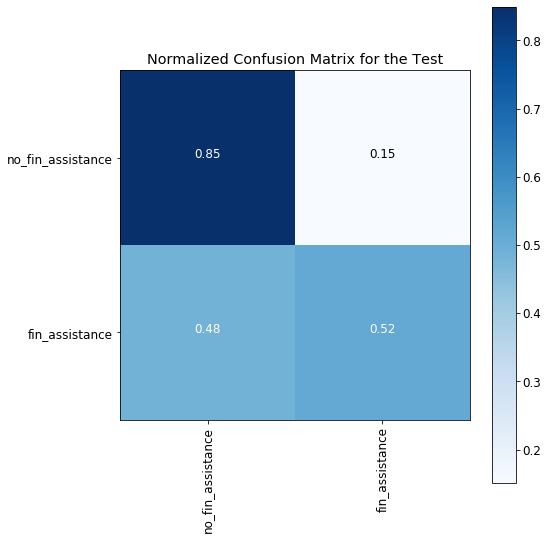

In [49]:
#save the confusion matrix
conf_mat4 = confusion_matrix( y_test,test_predict_rf)

#transform the count values into proportions
cm4= conf_mat4.astype('float') / conf_mat4.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.rcParams.update({'font.size': 12})

#plot the matrix
plt.imshow(cm4, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for the Test')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm4.max() / 2.

for i, j in itertools.product(range(cm4.shape[0]), range(cm4.shape[1])):
        plt.text(j, i, format(cm4[i, j], fmt),horizontalalignment="center",
                 color="white" if cm4[i, j] > thresh else "black")

plt.tight_layout()

As we can see from the confusion matrix the model was able to predict both categories. The model was best able to predict individuals who will not require financial assistance, this was expected considering the imbalanced nature of our target (we did not balance the test data). 

Next, we will calculate the metrics on the test set and add them to the previous table to compare the results.

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#use the metrics from sklearn 
#evaluate prediction on train set 
accuracy_test_rf = accuracy_score(y_test, test_predict_rf)
precision_test_rf = precision_score(y_test, test_predict_rf)
recall_test_rf = recall_score(y_test, test_predict_rf)
f1_test_rf = f1_score(y_test, test_predict_rf)

#print results
print("Evaluation Metrics on the Test set")
print("The Accuracy score on the train set is: ", round(accuracy_test_rf,4))
print("The Precision score on the train set is: ", round(precision_test_rf,4))
print("The Recall score on the train set is:: ", round(recall_test_rf,4))
print("The F1 score on the train set is: ", round(f1_test_rf,4))

Evaluation Metrics on the Test set
The Accuracy score on the train set is:  0.844
The Precision score on the train set is:  0.0486
The Recall score on the train set is::  0.5155
The F1 score on the train set is:  0.0888


In [51]:
#add the test values to our dataframe with the results for easy comparison
summary_df = summary_df.append(pd.Series({'Variables in Model': '5', 'Accuracy': round(accuracy_test_rf,4), 
                                          'Recall': round(recall_test_rf,4), 
                                          'Precision': round(precision_test_rf,4), 
                                          'F1': round(f1_test_rf,4)},
                                         name = 'Test using Random Forest'),ignore_index = False)

#print results
summary_df

,Variables in Model,Accuracy,Precision,Recall,F1
Logistic Regression,5,0.7353,0.7465,0.7125,0.7291
Random Forest,5,0.8468,0.8376,0.8593,0.8493
KNN Model,5,0.8234,0.8092,0.8463,0.8273
Test using Random Forest,5,0.844000,0.048600,0.515500,0.088800


As we can see from the table above, the accuracy of the Random Forest model when applied to the test data was similar to the accuracy of the Random Forest model when applied to the training dataset. When applied to the test data, the Random Forest had a lower recall score, but was not as low as we were expecting given the imbalanced target. 

The precision and the F1 score are really low and we expected that because the negatives (meaning people who did not receive financial assistance) are much more prevalent than the positives (meaning people who received financial assistance) in our target.

Next, we will create the Ensemble model.

## Ensemble Model

We decided to use the stack generalization or "stacking" method for our Ensemble model. 

We preferred this model instead of the bagging or boosting methods for the following reasons:
- Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset).
- Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).

We chose to use Logistic Regression as the final model to combine the predictions because we are doing a classification model.

We used this [link](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/) to guide us to build the model.

The first step is to define the model and fit the training data.

In [52]:
#import the packages that we need
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier

#define the stacking model
#collect in the list level0 all the ML model to combine
level0=list()
level0.append(('lr',model_logreg))
level0.append(('rf',random_forest_model))
level0.append(('knn',knn_model))

#in level1 the model to use to combine the results
level1=LogisticRegression()

#collect all together into the StackingClassifier function
model=StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

#fit the model
model.fit(os_data_x, os_data_y)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=16)),
                               ('knn', KNeighborsClassifier(n_neighbors=19))],
                   final_estimator=LogisticRegression())

As we can see the Stacking model is evaluating the three models with the hyperparameters chosen before.

Now we will make predictions on the training set, plot a confusion matrix, and cross-validate our model.

In [53]:
#make predictions
predict_stack=model.predict(os_data_x)

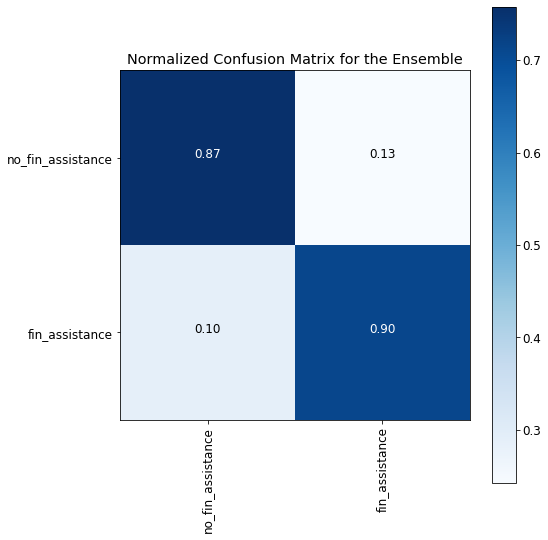

In [54]:
#save the confusion matrix
conf_mat5 = confusion_matrix(os_data_y,predict_stack)

#transform the count values into proportions
cm5 = conf_mat5.astype('float') / conf_mat5.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)


#plot the matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for the Ensemble')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm5.max() / 2.

for i, j in itertools.product(range(cm5.shape[0]), range(cm5.shape[1])):
        plt.text(j, i, format(cm5[i, j], fmt),horizontalalignment="center",
                 color="white" if cm5[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()

In [55]:
#use k-fold cross validation
cv_res_recall_stack = cross_val_score(model, os_data_x, os_data_y, cv=5,scoring='recall')
cv_res_accuracy_stack = cross_val_score(model, os_data_x, os_data_y, cv=5,scoring='accuracy')
cv_res_precision_stack = cross_val_score(model, os_data_x, os_data_y, cv=5,scoring='precision')
cv_res_f1_stack = cross_val_score(model, os_data_x, os_data_y, cv=5,scoring='f1')

#print results
print("Cross validated metrics for the Stacking Ensamble model")
print("The average Accuracy score for the 5 folds was: ", round(np.mean(cv_res_accuracy_stack),4))
print("The average Recall score for the 5 folds was: ", round(np.mean(cv_res_recall_stack),4))
print("The average Precision score for the 5 folds was: ", round(np.mean(cv_res_precision_stack),4))
print("The average F1 score for the 5 folds was: ", round(np.mean(cv_res_f1_stack),4))

Cross validated metrics for the Stacking Ensamble model
The average Accuracy score for the 5 folds was:  0.8488
The average Recall score for the 5 folds was:  0.8605
The average Precision score for the 5 folds was:  0.8408
The average F1 score for the 5 folds was:  0.8497


As we can see from the confusion matrix and the metrics the model was able to predict both categories quite well.

Now we will compare the Ensemble model with the previous models and apply the Ensemble model to the test set.

### Results Comparison

Next we will add a new row to the summary dataframe that we created before to compare the metrics of the ensemble model.

In [56]:
#add the test values to our dataframe with the results for easy comparison
summary_df = summary_df.append(pd.Series({'Variables in Model': '5', 'Accuracy': round(np.mean(cv_res_accuracy_stack),4), 
                                          'Recall': round(np.mean(cv_res_recall_stack),4), 
                                          'Precision': round(np.mean(cv_res_precision_stack),4), 
                                          'F1': round(np.mean(cv_res_f1_stack),4)},
                                         name = 'Stacking Ensemble Model'),ignore_index = False)

#print results
summary_df

,Variables in Model,Accuracy,Precision,Recall,F1
Logistic Regression,5,0.7353,0.7465,0.7125,0.7291
Random Forest,5,0.8468,0.8376,0.8593,0.8493
KNN Model,5,0.8234,0.8092,0.8463,0.8273
Test using Random Forest,5,0.844000,0.048600,0.515500,0.088800
Stacking Ensemble Model,5,0.848800,0.840800,0.860500,0.849700


As we can see the ensemble model performs slightly better than the Random Forest model. 

Next, we will calculate the predictions on the test set, plot a confusion matrix and evaluate the results.

In [57]:
#calculate and save the predictions from the test set
test_predict_ens=model.predict(x_test)

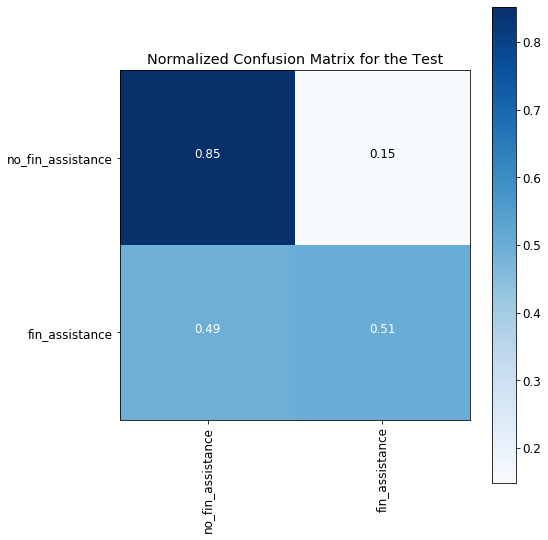

In [58]:
#save the confusion matrix
conf_mat6 = confusion_matrix(y_test,test_predict_ens)

#transform the count values into proportions
cm6 = conf_mat6.astype('float') / conf_mat6.sum(axis=1)[:, np.newaxis]

#set the plot
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.rcParams.update({'font.size': 12})

#plot the matrix
plt.imshow(cm6, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for the Test')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

#set the colors inside the blocks
fmt = '.2f'
thresh = cm6.max() / 2.

for i, j in itertools.product(range(cm6.shape[0]), range(cm6.shape[1])):
        plt.text(j, i, format(cm6[i, j], fmt),horizontalalignment="center",
                 color="white" if cm6[i, j] > thresh else "black")
        
#set the layout
plt.tight_layout()

In [59]:
#use the metrics from sklearn  
#evaluate prediction on train set 
accuracy_test_ens = accuracy_score(y_test, test_predict_ens)
precision_test_ens = precision_score(y_test, test_predict_ens)
recall_test_ens = recall_score(y_test, test_predict_ens)
f1_test_ens = f1_score(y_test, test_predict_ens)

#print results
print("Evaluation Metrics on the test set")
print("The Accuracy score on the train set is: ", round(accuracy_test_ens,4))
print("The Precision score on the train set is: ", round(precision_test_ens,4))
print("The Recall score on the train set is:: ", round(recall_test_ens,4))
print("The F1 score on the train set is: ", round(f1_test_ens,4))

Evaluation Metrics on the test set
The Accuracy score on the train set is:  0.8464
The Precision score on the train set is:  0.0485
The Recall score on the train set is::  0.5052
The F1 score on the train set is:  0.0884


When applied to the test dataset, the Ensemble model has relatively high scores for accuracy and recall, and low scores for precision and f1, as we expected for the same reasons we stated above.

Next we will compare the results of the Random Forest, the Ensemble model, and the results of those models when applied to the test dataset. We will drop the Logistic Regression and the KNN model that we did not choose in order to make the comparison easier.

In [60]:
#drop the logistic regression and knn models
summary_df.drop(['Logistic Regression','KNN Model'] , axis=0, inplace=True)

#add the test values to our dataframe with the results for easy comparison


summary_df = summary_df.append(pd.Series({'Variables in Model': '5', 'Accuracy': round(np.mean(accuracy_test_ens),4), 
                                          'Recall': round(np.mean(recall_test_ens),4), 
                                          'Precision': round(np.mean(precision_test_ens),4), 
                                          'F1': round(np.mean(f1_test_ens),4)},
                                         name = 'Test using Stacking Ensemble Model'),ignore_index = False)

#print results
summary_df

,Variables in Model,Accuracy,Precision,Recall,F1
Random Forest,5,0.8468,0.8376,0.8593,0.8493
Test using Random Forest,5,0.844000,0.048600,0.515500,0.088800
Stacking Ensemble Model,5,0.848800,0.840800,0.860500,0.849700
Test using Stacking Ensemble Model,5,0.846400,0.048500,0.505200,0.088400


As expected due to the imbalanced nature of the target variable in the test set, the Random Forest and Stacking Ensemble models performed better on the training data than on the testing data. The Stacking Ensemble model and Random Forest model performed similarly to each other for both datasets.

## Conclusions

Given the results of our models, we do not feel that the added computational expense of an Ensemble model is justified. We would instead prefer to use the Random Forest model for our predictions.

Based on our results, we can say that our model predicts whether an individual millennial requires financial assistance with close to 85% accuracy, and 50% recall. To achieve a higher recall, we believe we would need either more observations, more data points, a more sophisticated model, or a combination of these.  